*Authors:* 

# Lesson 10: Visualisation

*Goals*: Making plots and visualizing data in python

A vital part of scientific computing is not just handling data, but also presenting that data to people cleanly and understandably. The vast majority of python plotting is handled via a package called `matplotlib` or more specifically, its sub-package `pyplot`. 

In this lesson, we will cover the common applications of `matplotlib`, how to use them, and how to tweak plotting styles to achieve clear visualizations.

Content:
- Matplotlib documentation
- The plot function
- The figure framework
- Histograms
- Images, heatmaps and Seaborn


## Matplotlib documentation

This lesson is designed to give an introduction to how one can generate plots in python. However, the options and tools provided by just the `pyplot` subpackage of `matplotlib` are far too numerous to cover in one lesson. Therefore, one of the most vital hints to learn from this lesson is to check the MPL documentation when you need to generate a specific type of plot. Chances are, there are pre-built functions and examples already provided.

The link to the documentation page can be found here https://matplotlib.org/stable/api/pyplot_summary.html

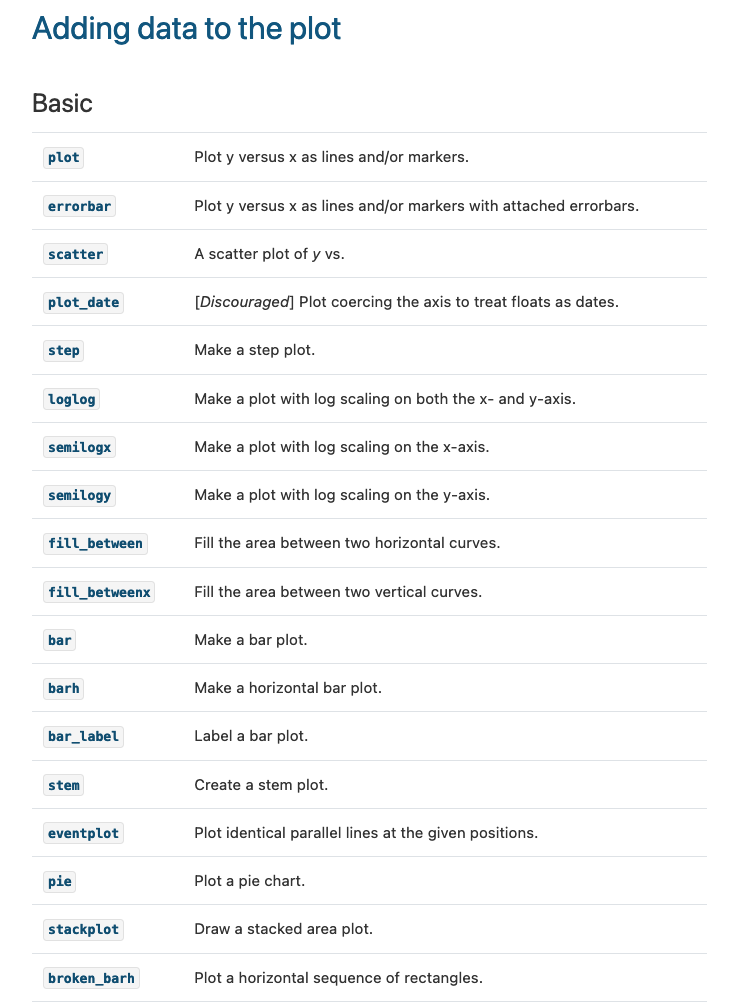

## The plot function

The first step is to import `matplotlib.pyplot` as well as `numpy`, the latter of which we will use for its array operations. Much like it is common practice to import `NumPy` as `np`, `matplotlib.pyplot` is often shortened to `plt`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

We will work with the `plot` function in the following:

In [ ]:
plt.plot([0, 1, 2], [0, 1, 0.5], marker="o", linestyle="None")

Only single coordinate values are plotted: matplotlib does not know of a concept like "smooth functions". By default, lines are drawn, though, which are linear interpolations of the given points.

In [ ]:
plt.plot([0, 1, 2], [0, 1, 0.5])

You can, however, evaluate function values on a number of $x$ values and plot the result. If the density of points is high enough (at least one point per pixel), you will get a visually smooth function.

We first need to define our data. To start with, we will use a simple linear function, 
$$
y = f(x) = 0.5x  + 3 
$$
We initially define our $x$ range for which we want to plot this function, and then calculate the corresponding $y$ values using numpy array operations

In [ ]:
## Create x range from 0 to 10, with 1000 points in between to ensure smooth coverage
data_x = np.linspace(start=0, stop=10, num=1000)

## Calculate y values according to our function f(x):
data_y = 0.5 * data_x + 3.0

## Ensure the shapes of both arrays still match
print("data_x.shape :", data_x.shape)
print("data_y.shape :", data_y.shape)

Now we can plot our function. The simple plotting function for this is called, appropriately, `plt.plot()`. The function takes two mandatory arguments, which are the $x$ and $y$ values of the to-be-plotted points. Additionally, a long list of keyword arguments is available, which will be covered later.  

In [ ]:
plt.plot(data_x, data_y)

As we can see, this plots the linear function we have defined in the previous step. By default, the plot range is chosen such that the entire input data is covered. However, the plot we produce still has some glaring issues. It has no axis labels indicating the meaning of the x- and y-axis, no legend describing what the lines correspond to, and so on. Addressing this will be the topic of the next section. However, for now, let us experiment with the basic plotting function.

### Intermission task 1

(It is voluntary and just a quick check for yourself that you understood the concepts above.)

Calculate the values of the $\sin()$ function in the range of [-10, 10] and plot the result. 

## The figure framework

Now that we know how to produce a basic plot, we can make it look nice as well. 

There are two approaches to manipulating plots in matplotlib. One uses the `plt` buffer, while the other makes use of `figure` objects. In this lesson we will be covering the second approach, however, there are plenty of tutorials and documentation for both.

In [ ]:
data_x = np.linspace(start=0, stop=10, num=1000)
data_y = 0.5 * data_x + 3.0

The initial step of using the `figure` approach is to create a figure object. We make use of the `figsize` argument to define the size of our produced figure in inches.
Note that Jupyter notebooks rescale displayed plots to fit on the page, so the absolute size may not be directly apparent while using a notebook.
It will, however, be relevant when we try and save the figures late on. 

Subplots can be added to our figure with the help of the function `add_subplot()`.
For now, we only want to add one subplot. However, this function allows us to easily have figures with multiple panels.
The arguments are (`nrows`, `ncols`, `index`).
The first two describe how many rows and columns of subplots we want, in our case of just one subplot both numbers are 1.
The last one is the index of the subplot we are currently adding, starting from 1.
`add_subplot()` returns an axis object that can then be used to call plotting functions.

In [ ]:
fig = plt.figure(figsize=(6, 4))

subplot = fig.add_subplot(1, 1, 1)

## We can now call the same plot() function that we used previously on the subplot objects.
subplot.plot(data_x, data_y)

## This reproduces the previous plot

Now we can start editing the properties of our subplot.

As a first step, we will be adding labels to the axis by using `set_xlabel()` and `set_ylabel()`.
Both functions take a string as their arguments, which will be the label used for a given axis.  

Moreover, we can manually set the plotting range, for example, to explicitly include the origin (0,0)

In [ ]:
fig = plt.figure(figsize=(6, 4))
subplot = fig.add_subplot(1, 1, 1)
subplot.plot(data_x, data_y)

subplot.set_xlabel("x")
subplot.set_ylabel("y")

subplot.set_xlim([0, 10])
subplot.set_ylim([0, 8])

We can now see the added labels and the modified axis range in the plot. However, a legend is still missing, as our plot line has no assigned label.

To fix our label problem we need to look at the plotting function.
In addition to the x and y data, the plot function has many optional parameters that can be used to modify the appearance of the resulting plot.
A full list of keyword arguments can be found here [https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html)

For now, however, we focus on a selected subset:
- `x`: x data to be plotted
- `y`: y data to be plotted
- `label`: label used for the legend
- `color`: defines the color of the line
- `linewidth`: the thickness of the line in pixels
- `linestyle`: style of line to be used, ex. `'-'` solid, `':'` doted, `'--'` dashed...
- `alpha`: alpha channel of the line color, values < 1 make the line transparent

If a label is passed as keyword argument, we can add a legend.
There are several optional arguments for a legend.
The two we will briefly cover are `loc` and `frameon`.
Loc describes the position at which the legend will be paced.
Possible arguments are `'best'`, `'upper left'`, `'upper right'`, `'lower left'`, `'lower right'`, `'upper center'`, 
`'lower center'`, `'center left'`, `'center right'`, and `'center'`.
Positional arguments place the legend at the respective position.
`best` tries to automatically select the best position based on available space.
This is the default behavior.
`frameon`, on the other hand, determines whether or not the legend has a border.

In [ ]:
fig = plt.figure(figsize=(6, 4))
subplot = fig.add_subplot(1, 1, 1)

subplot.plot(
    data_x,  # x data to be plotted
    data_y,  # y data to be plotted
    label="f(x) = 0.5 * x + 3.0",  # label used for the legend
    color="red",  # defines the color of the line
    linewidth=2,  # the thickness of the line in pixels
    linestyle="-",  # style of line to be used, ex. '-' solid, ':' doted, '--' dashed...
    alpha=1.0,  # alpha channel of the line color, values < 1 make the line transparent
)
subplot.set_xlabel("x")
subplot.set_ylabel("y")
subplot.set_xlim([0, 10])
subplot.set_ylim([0, 8])

subplot.legend(loc="best", frameon="true")

We are not limited to just one line per plot. For example, we can add a quadratic function to our plot.
This function is similarly defined to the linear one.
To add the quadratic function, we simply call the `plot` function again on the same subplot object, ideally with a different color and another label.

In [ ]:
data_x = np.linspace(start=0, stop=10, num=1000)
data_y_lin = 0.5 * data_x + 3.0
data_y_sq  = 0.25 * data_x ** 2

fig = plt.figure(figsize=(6, 4))
subplot = fig.add_subplot(1, 1, 1)

# plot the linear function
subplot.plot(data_x, data_y_lin, label="f(x) = 0.5 * x + 3.0", color="red", linewidth=2, linestyle="-", alpha=1.0)
# plot the quadratic function
subplot.plot(data_x, data_y_sq, label="f(x) = 0.25x^2", color="blue", linewidth=2, linestyle="-", alpha=1.0)
subplot.set_xlabel("x")
subplot.set_ylabel("y")
subplot.set_xlim([0, 10])
subplot.set_ylim([0, 8])
subplot.legend(loc="best", frameon="true")

Our plot is starting to take shape, however, there are still points to tweak: 
- The x-axis only has tick labels for every other number
- The font sizes are still rather small
- The figure has no title
- We are only displaying the figure right now, but to use it later we will need to save it

We will address all of these now:
- For most labels we can explicitly set the font size in pt. Note that both `size` and `fontsize` are valid arguments.
- We can use `set_xticks()` and `set_yticks()` to explicitly define which tick labels should be used in the plot.
Note that the `range` operation does not include the last point so we need to use range(0, 11) to include a tick at 10.
- Adjusting the fontsize of the tick labels is possible via the tick_params() function
- We can add a title to both the figure and individual subplots using either `suptitle()` on the figure
or `set_title()` on the subplot, both allowing us to directly set the font size.
- Finally we can save the plot using `savefig()` and pass a file name as the argument. 
The suffix of the filename determines the file type

In [ ]:
data_x = np.linspace(start=0, stop=10, num=1000)
data_y_lin = 0.5 * data_x + 3.0
data_y_sq = 0.25 * data_x**2

fig = plt.figure(figsize=(6, 4))
subplot = fig.add_subplot(1, 1, 1)

subplot.plot(data_x, data_y_lin, label="f(x) = 0.5x + 3.0", color="red", linewidth=2, linestyle="-", alpha=1.0)
subplot.plot(data_x, data_y_sq, label="f(x) = 0.25x^2", color="blue", linewidth=2, linestyle="-", alpha=1.0)


subplot.set_xlabel("x", size=16)
subplot.set_ylabel("y", fontsize=16)
subplot.legend(loc="best", frameon="true", fontsize=16)
subplot.set_xlim([0, 10])
subplot.set_ylim([0, 8])


subplot.set_xticks(range(0, 11))
subplot.set_yticks(range(0, 9))
# set the tick label size
subplot.tick_params(axis="x", labelsize=16)
subplot.tick_params(axis="y", labelsize=16, rotation=90)
# Set titles
fig.suptitle("Figure Title", fontsize=16)
subplot.set_title("Subplot title", fontsize=10)

# save the figure
fig.savefig("plot.png")

In some cases we have data or functions that have an exponential relation between x values and y values.
In such cases it can be useful to change one or both axis to be logarithmic.
We can use `set_xscale()` and `set_yscale()` for that.
Having a log scale also mean we cannot use 0 in the axis range, since `log(0)` is undefined.

In [ ]:
data_x = np.linspace(start=0, stop=10, num=1000)
data_y_lin = 0.5 * data_x + 3.0
data_y_sq  = 0.25 * data_x**2
data_y_exp = 2**data_x

fig = plt.figure(figsize=(6, 4))
subplot = fig.add_subplot(1, 1, 1)

subplot.plot(data_x, data_y_lin, label="f(x) = 0.5x + 3.0", color="red", linewidth=2, linestyle="-", alpha=1.0)
subplot.plot(data_x, data_y_sq, label="f(x) = 0.25x^2", color="blue", linewidth=2, linestyle="-", alpha=1.0)
subplot.plot(data_x, data_y_exp, label="f(x) = 2^x", color="green", linewidth=2, linestyle="-", alpha=1.0)

subplot.set_xlabel("x", size=16)
subplot.set_ylabel("y", fontsize=16)
subplot.legend(loc="best", frameon="true", fontsize=16)

subplot.set_xlim([0, 10])
subplot.set_xticks(range(0, 11))

## Here we set the y-axis to be logarithmic, doing the same for the x-axis is also possible with set_xscale()
subplot.set_yscale("log")
subplot.set_ylim([0.1, 100])

subplot.tick_params(axis="x", labelsize=16)
subplot.tick_params(axis="y", labelsize=16, rotation=90)

fig.suptitle("Figure Title", fontsize=16)
subplot.set_title("Subplot title", fontsize=10)
fig.savefig("plot.png")

### Intermission task 2

(It is voluntary and just a quick check for yourself that you understood the concepts above.)

The code block below demonstrates how to generate three side by side subplots. Use this to recreate the figure above, but with one line in each subplot, rather than both in the same plot. Use a log scale where sensible.

In [ ]:
fig = plt.figure(figsize=(16, 4))
subplot1 = fig.add_subplot(1, 3, 1)
subplot2 = fig.add_subplot(1, 3, 2)
subplot3 = fig.add_subplot(1, 3, 3)

## Overview of the parts of a figure
From [matplotlib's quickstart](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#parts-of-a-figure):

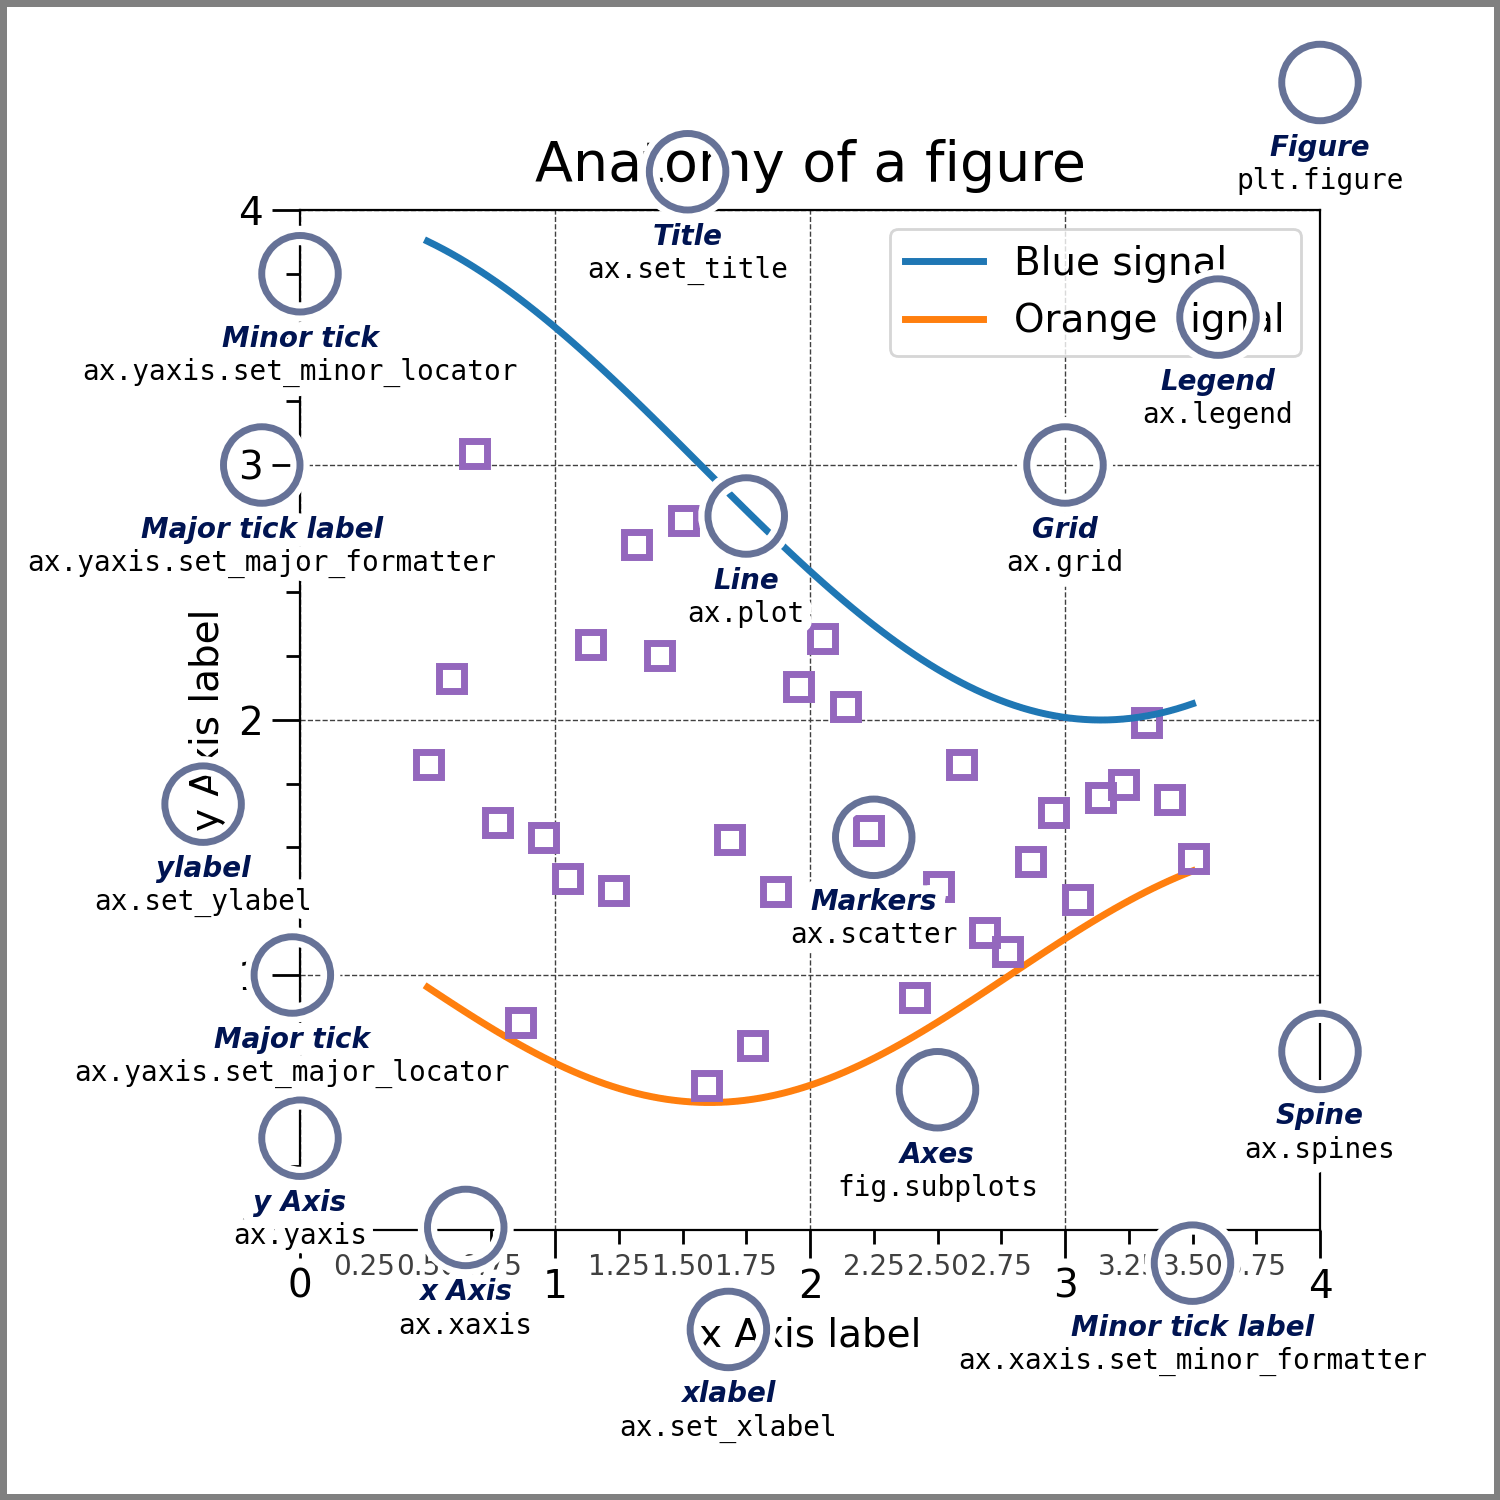

## Histograms

The `plot()` function is very useful when we have x and y values available, however, this is not always the case. In physics applications, however, we often do not have specific functions, but a data set containing multiple measurements of a physical quantity. In order to visualize these measurements we need histograms.

`matplotlib` has built-in methods for creating and plotting histograms, which are usable just like the `plot()` function. 

First we generate our data set. In this case, consisting of 100 points, randomly drawn from a uniform distribution.

In [ ]:
data_uniform = np.random.random(100)

The built-in histogram function is called `hist()` it takes one mandatory argument, which is the data that is to be plotted in the histogram.
In addition, `hist()` takes similar keyword arguments as the `plot()` function, which can manipulate the histogram's appearance,
as well as arguments defining the range of bins and the number of bins.
For now, we will look at the default histogram output.
Without any specifications, `hist()` will select a bin range based on the min and max values of the data, and will default to 10 bins.

In [ ]:
fig = plt.figure(figsize=(6, 4))
subplot = fig.add_subplot(1, 1, 1)

subplot.hist(data_uniform, label="uniform")

subplot.set_xlabel("x")
subplot.set_ylabel("number")
subplot.legend(loc="best", frameon="true")

Just like for the `plot()` function, we can have multiple histograms in the same plot.
For example, we can plot several gaussian distributions with varying widths:

There are several available `histtype` options that define how the histogram looks.
The options are:
- `'bar'`: standard bar type histogram
- `'barstacked'`: identical to 'bar' for one set of data, but if multiple data sets are plotted, the bars are stacked
- `'step'`: a line showing only the outline of the histogram
- `'stepfilled'`: like 'step', but the area under the line is filled with a color

The last two options, 'stepfilled' and 'step', are especially useful when overlaying histograms.

In [ ]:
data_gauss1 = np.random.randn(100) * 1.0
data_gauss2 = np.random.randn(100) * 2.0
data_gauss3 = np.random.randn(100) * 3.0

fig = plt.figure(figsize=(10, 4))
subplot1 = fig.add_subplot(1, 2, 1)
subplot2 = fig.add_subplot(1, 2, 2)

## Here is how the overlaid histograms look with the default setting
subplot1.hist(data_gauss3, label="gaussian 3")
subplot1.hist(data_gauss2, label="gaussian 2")
subplot1.hist(data_gauss1, label="gaussian 1")
subplot1.set_xlabel("x")
subplot1.set_ylabel("number")
subplot1.legend(loc="best", frameon="true")
subplot1.set_title("Bar Histograms")

## Here is how the overlaid histograms look with 'step' as histtype
subplot2.hist(data_gauss3, label="gaussian 3", histtype="step")
subplot2.hist(data_gauss2, label="gaussian 2", histtype="step")
subplot2.hist(data_gauss1, label="gaussian 1", histtype="step")
subplot2.set_xlabel("x")
subplot2.set_ylabel("number")
subplot2.legend(loc="best", frameon="true")
subplot2.set_title("Step Histograms")

One noticeable problem in the previous figure is that each histogram has different, independent bin sizes,
which makes comparisons between the historgrams difficult.
This happens because `hist()` determines the binning for each histogram based on the given data sets.
We can avoid this using two approaches, which will be explored in detail now.

1. Define the bin range for each histogram explicitly.
There are several ways to do this. The first involves giving a range and a number of bins.
Alternatively we can explicitly give the edges of the bins as a list or array. Note that we need one additional
Step here (21 instead of 20), since 20 bins require 21 edges to be correctly defined.
2. The `hist()` function has 3 return values, which we have so far ignored.
These return values are the counts in each bin, the edges of the bins, and the plotting object.
The last one we will ignore for now, but the bin ranges allow us to take the bin regions of the first histogram and use them for the other histograms. 
Catching the return values from the `hist()` function.
Even when we do not give a range, we can still specify a bin number.  
**Note:** Since the first histogram is used to define the bin range, we start with the largest gaussian.
This means that this technique does not work if it is not guaranteed that the range of one of the histograms covers the range of all the others.

In [ ]:
fig = plt.figure(figsize=(10, 4))
subplot1 = fig.add_subplot(1, 2, 1)
subplot2 = fig.add_subplot(1, 2, 2)

# 1. Set bins explicitly
# set the number of bins and a range
subplot1.hist(data_gauss3, label="gaussian 3", histtype="step", bins=20, range=(-8, 8))
# set the bin edges
subplot1.hist(data_gauss2, label="gaussian 2", histtype="step", bins=np.linspace(-8, 8, 21))
# set the number of bins and a range
subplot1.hist(data_gauss1, label="gaussian 1", histtype="step", bins=20, range=(-8, 8))
subplot1.set_xlabel("x")
subplot1.set_ylabel("number")
subplot1.legend(loc="best", frameon="true")
subplot1.set_title("Fixed Binning")

# 2. get the bins from the first histogramm
counts, bins, _ = subplot2.hist(data_gauss3, label="gaussian 3", histtype="step", bins=20)
# use the bins from the first histogram for the other histograms
subplot2.hist(data_gauss2, label="gaussian 2", histtype="step", bins=bins)
subplot2.hist(data_gauss1, label="gaussian 1", histtype="step", bins=bins)
subplot2.set_xlabel("x")
subplot2.set_ylabel("number")
subplot2.legend(loc="best", frameon="true")
subplot2.set_title("Adaptive Binning")

Often one needs to compare multiple data sets with different amounts of samples in each set.
For such applications it can be useful to normalize our histograms.
`hist()` has a built-in option to do this called `density`.
If this is set to true, the resulting histogram will be normalized such that the total area under the histogram comes out to 1.

In [ ]:
## Generating Gaussian sets with different amounts of points
data_gauss1 = np.random.randn(100) * 1.0
data_gauss2 = np.random.randn(1000) * 1.0
data_gauss3 = np.random.randn(10000) * 1.0

fig = plt.figure(figsize=(10, 4))
subplot1 = fig.add_subplot(1, 2, 1)
subplot2 = fig.add_subplot(1, 2, 2)

## No normalization, since density=False
counts, bins, _ = subplot1.hist(data_gauss3, label="gaussian 3", histtype="step", bins=40, density=False)
subplot1.hist(data_gauss2, label="gaussian 2", histtype="step", bins=bins, density=False)
subplot1.hist(data_gauss1, label="gaussian 1", histtype="step", bins=bins, density=False)
subplot1.set_xlabel("x")
subplot1.set_ylabel("number")
subplot1.legend(loc="best", frameon = "true")
subplot1.set_title("No normalization")

## Normalization, since density=Ture
counts, bins, _ = subplot2.hist(data_gauss3, label="gaussian 3", histtype="step", bins=40, density=True)
subplot2.hist(data_gauss2, label="gaussian 2", histtype="step", bins=bins, density=True)
subplot2.hist(data_gauss1, label="gaussian 1", histtype="step", bins=bins, density=True)
subplot2.set_xlabel("x")
subplot2.set_ylabel("number")
subplot2.legend(loc = "best", frameon = "true")
subplot2.set_title("Normalization")

## Images, heatmaps and Seaborn

In addition to presenting one-dimensional data, we can also use Python to visualize higher dimensional data, for example, images or 2D histograms. 

Initially, we will cover how we can load and display existing images. The simplest way of handling images involves the Python Imaging Library or `PIL` for short, which is maintained in the `Pillow` fork of the original `PIL`. 

`PIL` offers a wide range of image manipulation tools, the first of which is the ability to load images form a disk. The code below loads an image of the UHH logo and transforms it into a NumPy array:

In [ ]:
from PIL import Image

# Loading the image and converting it into a NumPy array
img = np.asarray(Image.open("images_to_deploy/uhh-logo.png"))
print(img.shape)

The shape of the array is (2550, 5500, 4). The first two dimensions correspond to its height and width in pixels, while the third dimension describes the color at a given pixel position in the RGBA format, which separately stores the red, green, and blue color components, as well as the transparency (alpha). 

Actually displaying the image is remarkably simple, and involves calling the `imshow()` function on the 3D array that describes the image.

In [ ]:
fig = plt.figure(figsize=(5, 10))
subplot = fig.add_subplot(1, 1, 1)

subplot.imshow(img)

### Two-dimensional histograms

Similarly, we can use the `matplotlib` to display other two-dimensional data.
For example, let's say we want to plot the density of a two-dimensional Gaussian distribution.

First we generate an array filled with gaussian noise with a shape of (20000,2).
The first dimension can be interpreted as the number of points, while the second one describes the dimensionality, which is 2 in this case.

In [ ]:
gaussian_2d = np.random.randn(20000, 2)

Now we can use `hist2d()` to plot a 2-dimensional representation of the Gaussian distribution.
`hist2d()` requires separate x and y arguments, in order to understand how fill the bins with data points.
Since we have both dimensions in one array, we can use array slicing to separate out the x and y components.
Bins can be set up similarly to how it was done in `hist()`.
However, it is also possible to provide a tuple of bin counts or bin ranges to achieve different binning in along the x and y axis.

There are some options to handle the binning:
- Simply providing one bin number will result in that many bins in both directions. If the range is not specified it is deduced from the data.
- Providing a tuple of bin numbers results in different binning in x and y.
- When providing a fixed range, it is also possible to use a tuple.

In [ ]:
fig = plt.figure(figsize=(16, 5))
subplot1 = fig.add_subplot(1, 3, 1)
subplot2 = fig.add_subplot(1, 3, 2)
subplot3 = fig.add_subplot(1, 3, 3)

# use one bin number
subplot1.hist2d(x=gaussian_2d[:,0], y=gaussian_2d[:, 1], bins=30)
subplot1.set_title("Uniform Binning, Auto Range")

# use a tuple of bin numbers
subplot2.hist2d(x=gaussian_2d[:, 0], y=gaussian_2d[:, 1], bins=(10, 100))
subplot2.set_title("Separate Binning, Auto Range")

# use a tuple of ranges
subplot3.hist2d(x=gaussian_2d[:, 0], y=gaussian_2d[:,1], bins=(30, 60), range=((-5, 5), (-10, 10)))
subplot3.set_title("Separate Binning, Fixed Range")

While it is intuitive that brighter colors correspond to higher densities, this is not a very precise measure.
To add an additional level of clarity, we can use a color bar.  
To create the color bar, we again need to capture the return values of our histogramming function.
It returns a 2D array with the histogram itself (counts for each bin), the bin edges along the x-axis, the bin edges along the y-axis and the image of the histogram.
The last return value, `Image`, is what we are after.
We then call `colorbar()` to generate the color bar for the histrogram.
This function needs two arguments, `Image`, to know which color range to show, and ax=subplot1, to indicate at which position the color bar should be placed.
The default color scale (or colormap, cmap for short) is `viridis`. Other scales are available. Here are examples using `jet` and `magma` in addition to the default scale.

In [ ]:
gaussian_2d = np.random.randn(20000, 2)

fig = plt.figure(figsize=(16, 4))
subplot1 = fig.add_subplot(1, 3, 1)
subplot2 = fig.add_subplot(1, 3, 2)
subplot3 = fig.add_subplot(1, 3, 3)

# plot with the viridis colormap
counts, xedges, yedges, Image = subplot1.hist2d(x=gaussian_2d[:, 0], y=gaussian_2d[:, 1], bins=30)
fig.colorbar(Image, ax=subplot1)
subplot1.set_title("Viridis")

# plot with the jet colormap
counts, xedges, yedges, Image = subplot2.hist2d(x=gaussian_2d[:, 0], y=gaussian_2d[:, 1], bins=30, cmap="jet")
fig.colorbar(Image, ax=subplot2)
subplot2.set_title("Jet")

# plot with the magma colormap
counts, xedges, yedges, Image = subplot3.hist2d(x=gaussian_2d[:, 0], y=gaussian_2d[:, 1], bins=30, cmap="magma")
subplot3.set_title("Magma")
fig.colorbar(Image, ax=subplot3)

Finally, we should add axis labels to the x and y axis and the color bar.
Setting the x and y labels works just like in the 1D case.
Setting the label of the color bar involves catching the return of the color bar function and then setting the label on the returned object.
The `labelpad` and `rotation` arguments defines the position and orientation of the label

In [ ]:
gaussian_2d = np.random.randn(20000, 2)
fig = plt.figure(figsize=(5, 4))
subplot1 = fig.add_subplot(1, 1, 1)
counts, xedges, yedges, Image = subplot1.hist2d(x=gaussian_2d[:, 0], y=gaussian_2d[:, 1], bins=30)
subplot1.set_title("Viridis")
subplot1.set_xlabel("dimension 1")
subplot1.set_ylabel("dimension 2")

cbar = fig.colorbar(Image, ax=subplot1)
cbar.ax.set_ylabel("# of samples", rotation=270, labelpad=10)

### Seaborn

Another package to point out here is `seaborn` which offers special methods for heatmaps. Another great advantage is that `seaborn` is built around `pandas` data frames. These frames allow for an easy method of organizing data. In the following, we will explore an example of this.

First, we import seaborn.

In [ ]:
import seaborn as sns

Seaborn comes with a set of example data sets. The following data describes the number of airline passengers who flew per month in the years between 1949 to 1960.
If we print the data, we can see that the data set contains 3, technically 4 columns.
The first one is the index of the data points, then we have the year, the month, and the number of passengers in that month.

In [ ]:
flights = sns.load_dataset("flights")
print(flights)

We can use data frames to select columns using their names, for example, if we only want the `month` columns:

In [ ]:
print(flights["month"])

We can further make selections based on these indices, for example looking only at the January data

In [ ]:
print(flights[flights["month"] == "Jan"])

To visualize the data we first need to convert it from a 1D shape into a 2D shape.
To this end we use the `pivot()` method, which turns the data into a pivot table where the key given in the `index` argument is used as the row index, the key given in the `columns` argument is used as the column index, and `values` decides which key is used to fill the table.

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot(index="month", columns="year", values="passengers")

print(flights)

Now we can use Seaborn's `heatmap()` function to visualize.
Note that the function automatically adds a color bar.
Further it directly uses the index keys ('year' and 'month') as axis labels and the respective years and months as the tick labels.

In [ ]:
ax = sns.heatmap(flights)

We can also integrate Seaborn plots into Matplotlib figures by passing the subplot object to the `ax` keyword argument when generating the heatmap.

Another very useful feature of Seaborn heat maps is the annotate feature.
By setting `anot=True` we can directly displays the content of each cell in the plot.
We additionally set `fmt='.0f'` to specify the formatting of the displayed numbers.
In this case, we set it to 0 floating points, as we are dealing with integers.

In [ ]:
fig = plt.figure(figsize=(9, 5))
subplot1 = fig.add_subplot(1, 1, 1)
ax = sns.heatmap(flights, annot=True, ax=subplot1, fmt=".0f")

## End of part 1

This is the end of the part you should read at home. Everything below this cell will be topic in the next exercise session and you don't need to look at this now.

## Interactive Part

### 1. Flying ball part 2

You remember task 3 in the teaching notebook 3?

Imagine a ball on earth that is thrown from the ground with an initial velocity in of 4 m/s in x-direction and 4 m/s in y-direction (starting in a 45° angle). Where is the ball touching the ground again? Use the following information about the ball and the environment.

In [ ]:
import math
g = -9.81  # acceleration on earth (in y-direction) in m/s^2
m = 0.5  # mass of the ball
A = 0.02  # cross sectional area (Querschnittsfläche) of the ball in m^2
rho_air = 1.225  # density of air in kg/m^3
c_w = 0.45  # drag coefficient (Strömungswiderstandskoeffizient)

This time we are interested in the full trajectory of the ball for the three scenarios:
1. analytic solution without friction
2. numerical solution without friction
3. numerical solution with friction

Let's collect for all three cases a list or a numpy array that contains all $x$ positions, all $y$ positions, the $v_x$, $v_y$, $a_x$ and $a_y$ values (one list or array for each of the listed observables.

We provide the analytic functions:

In [ ]:
def x_analytical(a_0, v_0, t):
    """
    calculates the flight distance of the ball after flying time t with constant acceleration

    a_0 -- constant acceleration of the ball
    v_0 -- start velocity of the ball
    t -- time of flight
    return -- flight distance of the ball
    """

    return 0.5 * a_0 * t**2 + v_0 * t


def v_analytical(a_0, v_0, t):
    """
    calculates the velocity of the ball after flying time t with constant acceleration

    a_0 -- constant acceleration of the ball
    v_0 -- start velocity of the ball
    t -- time of flight
    return -- velocity of the ball
    """

    return a_0 * t + v_0

**Task a):** Create the four numpy arrays `xs_an`, `ys_an`, `vs_x_an` and `vs_y_an` that contain the $x$ positions, the $y$ positions, the velocities in $x$ direction and the velocities in $y$ direction, respectively, for the following array of time values `ts_an` calculated with the analytic solution.

In [ ]:
import numpy as np

ts_an = np.arange(0, 0.82, 0.0001)

In [ ]:
# BEGIN-LIVE
xs_an = x_analytical(0, 4, ts_an)
ys_an = x_analytical(g, 4, ts_an)
vs_x_an = v_analytical(0, 4, ts_an)
vs_y_an = v_analytical(g, 4, ts_an)
# END-LIVE

The following functions calculate the numerical solutions as in notebook 3.
Each function returns a tuple containing lists of the $x$ positions, the $y$ positions, the velocities in $x$ direction, the velocities in $y$ direction, the accelerations in $x$ direction and the accelerations in $y$ direction at all the time steps that where used in the iterative process and a list of all the used $t$ values.

In [ ]:
def flight_numerically(v_x0, v_y0, delta_t):
    # define the variables that will change during the iteration and set them to the start values
    x = [0]
    y = [0]
    v_x = [v_x0]
    v_y = [v_y0]
    a_x = [0]
    a_y = [g]
    t = [0]

    while(y[-1] > 0 or x[-1] == 0):  # second part of the condition is needed for the first iteration where the ball is starting from the ground
        x.append(x[-1] + v_x[-1] * delta_t)
        y.append(y[-1] + v_y[-1] * delta_t)
        v_x.append(v_x[-1] + a_x[-1] * delta_t)
        v_y.append(v_y[-1] + a_y[-1] * delta_t)
        a_x.append(a_x[-1])
        a_y.append(a_y[-1])
        t.append(t[-1] + delta_t)
    return x, y, v_x, v_y, a_x, a_y, t

In [ ]:
def flight_friction(v_x0, v_y0, delta_t):
    # define the variables that will change during the iteration and set them to the start values
    x = [0]
    y = [0]
    v_x = [v_x0]
    v_y = [v_y0]
    v = math.sqrt(v_x[0]**2 + v_y[0]**2)
    a_x = [-1 / (2 * m) * A * c_w * rho_air * v * v_x[0]]
    a_y = [g - 1 / (2 * m) * A *c_w * rho_air * v * v_y[0]]
    t = [0]

    while(y[-1] > 0 or x[-1] == 0):  # second part of the condition is needed for the first iteration where the ball is starting from the ground
        x.append(x[-1] + v_x[-1] * delta_t)
        y.append(y[-1] + v_y[-1] * delta_t)
        v_x.append(v_x[-1] + a_x[-1] * delta_t)
        v_y.append(v_y[-1] + a_y[-1] * delta_t)
        v = (math.sqrt(v_x[-1]**2 + v_y[-1]**2))
        a_x.append(-1 / (2 * m) * A * c_w * rho_air * v * v_x[-1])
        a_y.append(g - 1 / (2 * m) * A *c_w * rho_air * v * v_y[-1])
        t.append(t[-1] + delta_t)

    return x, y, v_x, v_y, a_x, a_y, t

Now we can calculate the positions, velocities and so on

In [ ]:
xs_num, ys_num, vs_x_num, vs_y_num, as_x_num, as_y_num, ts_num = flight_numerically(4, 4, 0.0001)

In [ ]:
xs_fri, ys_fri, vs_x_fri, vs_y_fri, as_x_fri, as_y_fri, ts_fri = flight_friction(4, 4, 0.0001)

**Task b):** Plot the trajectories ($y$ positions vs $x$ positions) for all the three cases in one plot.
Make sure your plot has:
- axis labels
- a legend
- a title

In [ ]:
# BEGIN-LIVE
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
subplot = fig.add_subplot(1, 1, 1)
subplot.plot(xs_an, ys_an, label='analytical')
subplot.plot(xs_num, ys_num, label='numerical', ls='--')
subplot.plot(xs_fri, ys_fri, label='friction')
subplot.set_xlabel('x / m')
subplot.set_ylabel('y / m')
subplot.set_title('Trajectory of a ball')
subplot.legend()
subplot.grid()
# END-LIVE

**Task c):** Plot some variables (e.g. velocity components) against the time (for all three cases).

In [ ]:
# BEGIN-LIVE
fig = plt.figure(figsize=(12, 8))
subplot = fig.add_subplot(1, 1, 1)
subplot.plot(ts_an, vs_x_an, label='analytical')
subplot.plot(ts_num, vs_x_num, label='numerical')
subplot.plot(ts_fri, vs_x_fri, label='friction')
subplot.set_xlabel('t / s')
subplot.set_ylabel(r'$v_x / \frac{m}{s}$')
subplot.set_title('Velocity in x direction of a ball')
subplot.legend()
subplot.grid()
# END-LIVE

In [ ]:
# BEGIN-LIVE
fig = plt.figure(figsize=(12, 8))
subplot = fig.add_subplot(1, 1, 1)
subplot.plot(ts_an, vs_y_an, label='analytical')
subplot.plot(ts_num, vs_y_num, label='numerical')
subplot.plot(ts_fri, vs_y_fri, label='friction')
subplot.set_xlabel('t / s')
subplot.set_ylabel(r'$v_y / \frac{m}{s}$')
subplot.set_title('Velocity in y direction of a ball')
subplot.legend()
subplot.grid()
# END-LIVE

In [ ]:
# BEGIN-LIVE
fig = plt.figure(figsize=(12, 8))
subplot = fig.add_subplot(1, 1, 1)
subplot.plot(ts_fri, as_x_fri, label='friction')
subplot.set_xlabel('t / s')
subplot.set_ylabel(r'$a_x / \frac{m}{s^2}$')
subplot.set_title('Acceleration in x direction of a ball')
subplot.legend()
subplot.grid()
# END-LIVE

In [ ]:
# BEGIN-LIVE
fig = plt.figure(figsize=(12, 8))
subplot = fig.add_subplot(1, 1, 1)
subplot.plot(ts_fri, as_y_fri, label='friction')
subplot.set_xlabel('t / s')
subplot.set_ylabel(r'$a_y / \frac{m}{s^2}$')
subplot.set_title('Acceleration in y direction of a ball')
subplot.legend()
subplot.grid()
# END-LIVE

### 2. Multiple measurement

Consider an experiment where an object is moving on a predefined path.
At some fixed positions of the path, time measurements are done.
Assume the experiment is repeated several times with the same initial conditions.
Ideally, the measurements should give the same results in all repetitions of the experiment, but due to statistical fluctuations they don't.  
Below you find an array with all the positions in m where a time measurement was taken.
In a separate array you find all the time measurements in s, each row represents one position where the measurements were done and each column corresponds to a repetition of the experiment.

In [ ]:
positions = np.array([0, 2.5, 4, 6, 8, 11, 13, 14.8, 18, 20])

In [ ]:
# This cell gives you some insights how the measured times were created, because we didn't take actual measurements
# How would you expect the plot to look like?
times_true = np.array([0, 2, 3, 4, 6, 7.5, 8.8, 10, 12, 15])
measurement_errors = np.random.default_rng(8469).normal(0, 0.4, (10, 5))  # normal distributed errors
measurement_errors[0, :] = 0  # no error for the start time
times = times_true.reshape((10, 1)) + measurement_errors # convert to column and use broadcasting
times

**Task:** Plot for each position the mean of the measured time and the standard deviation of the measurements as an errorbar.
Plot the values with some marker (can be a dot or a cross or something like that) and connect the markers with a dashed line.
Make sure your plot has:
- axis labels
- title
- grid

**Hint:** Use the `errorbar` function.
This time we don't give you the link to the documentation and expect that you find it on your own.

In [ ]:
# BEGIN-LIVE
mean_times = np.mean(times, axis=1)
stdev_times = np.std(times, axis=1)

fig = plt.figure(figsize=(12, 8))
subplot = fig.add_subplot(1, 1, 1)
subplot.errorbar(positions, mean_times, stdev_times, linestyle='--', marker='o')
subplot.set_xlabel('position / m')
subplot.set_ylabel('time / s')
subplot.set_title('Measured times of the object at measurement positions')
subplot.grid()
# END-LIVE

### 3. Distribution identification

The following cell creates 4 numpy arrays `data1`, `data2`, `data3` and `data4` containing data that are following different probability distributions.
Possible distributions are:
- uniform
- normal
- exponential
- poisson

Find out which dataset is following which distribution.

**Task:** Create a figure with two subplots on top of each other and plot histograms of the datasets in these two subplots.
One of the two subplots should contain three of the four datasets and the other subplot the remaining dataset.
Why do we need two different subplots, why shouldn't we plot all datasets in one subplot?
For the subplot with the three datasets, make sure that all of them have the same binning.
Make sure your plot has:
- axis labels
- title
- legend containing the distribution the dataset is based on
- reasonable binning
- meaningful $x$ ticks (might depend on your figure size, but possibly you have to set the $x$ ticks for one of the two subplots the  manually - for which distribution is that relevant?)

**Note:** If the following cell is not minimized by default, you can select the cell, move the curser to the left and click on the blue bar appearing at the side.

In [ ]:
data1 = np.array([
       0.25913318, 1.68824434, 0.01777485, 0.3301401, 0.6202918,
       0.43792411, 1.72412888, 0.63768303, 1.05257966, 0.76139742,
       1.66968274, 0.6460971 , 0.50740482, 0.79100756, 1.39495292,
       1.50482076, 0.08821884, 0.8576671 , 0.83473783, 1.36648322,
       1.40955418, 1.02238922, 1.74665971, 0.34772512, 1.36551503,
       1.71950124, 0.00632854, 0.90935876, 0.27714502, 0.43553659,
       1.40389237, 0.9963532 , 0.1198729 , 1.61634555, 0.13634231,
       0.61948566, 0.26059625, 1.13704782, 1.3440073 , 0.32061325,
       0.61210203, 0.07394648, 1.58564669, 0.16152895, 0.42708303,
       0.17050518, 1.103156  , 0.57715409, 1.38486455, 1.00661417,
       1.89823571, 1.2895902 , 1.69101981, 1.92056403, 0.44258902,
       0.51822122, 1.83022758, 0.01416086, 0.24134314, 0.78919466,
       1.40210364, 0.04119028, 0.78632142, 1.76532173, 1.76886377,
       1.90503003, 0.9639723 , 1.28969641, 1.5126118 , 0.24842997,
       1.92292736, 0.79842134, 0.99194148, 0.26674123, 0.33083377,
       1.01226423, 1.19334057, 1.77753317, 1.25972206, 0.99819565,
       0.88199621, 0.47081195, 1.82448097, 1.27708945, 1.42381866,
       0.25553992, 1.77893097, 1.12052305, 0.51903927, 0.33161972,
       1.0798084 , 0.07340262, 1.80284014, 1.70522877, 1.96133657,
       0.07147422, 0.76873618, 1.67133758, 1.63661095, 0.89533385,
       0.94812581, 1.21262086, 0.43751749, 1.32668284, 0.74648805,
       0.78559976, 1.84817475, 1.75766224, 0.00770026, 1.48202053,
       0.97735222, 0.48679785, 1.70650763, 1.06602693, 0.34018451,
       0.04528516, 0.78080951, 0.74987154, 1.9031743 , 0.82249258,
       1.73326229, 0.93924336, 1.20315793, 0.95899646, 0.9067468 ,
       0.81741866, 0.31765532, 1.20976877, 1.99820821, 1.34801316,
       1.95289754, 0.08162536, 1.21502268, 1.07361897, 0.26035406,
       1.68121317, 0.56081705, 1.29861266, 0.44639329, 0.14641088,
       1.18202941, 1.23407057, 0.67647358, 1.91585197, 1.72451388,
       0.32374047, 0.71806006, 1.72492871, 1.99827891, 1.6691778 ,
       0.58821203, 0.52261459, 1.68351199, 0.4637915 , 0.00474775,
       0.40041837, 0.94852499, 0.59089446, 0.34052376, 1.54959391,
       1.8465957 , 1.66767739, 1.22296022, 0.07256499, 1.36436187,
       0.33895047, 0.25745784, 1.04548956, 1.63261209, 0.42268065,
       1.54236652, 0.59730061, 0.04385505, 0.27483278, 1.00783798,
       0.94819321, 0.21134478, 1.24141183, 0.23200039, 0.33590938,
       1.28075894, 0.81903232, 0.80658148, 0.27021421, 0.27830331,
       1.83679134, 0.05316305, 1.40873394, 0.91278651, 1.90862131,
       0.81383265, 0.04736247, 1.01769001, 1.17451688, 1.4401966 ,
       0.31121736, 0.40973534, 0.74834631, 1.80145434, 0.56685873,
       0.5985513 , 1.94792497, 0.42376031, 1.14749623, 0.31058937,
       0.99266489, 1.99075009, 1.12449799, 1.11992783, 1.02379863,
       0.84541542, 0.91330208, 0.67655734, 1.7232897 , 1.52024344,
       0.03395098, 1.54403257, 0.98628063, 1.7985558 , 0.82101397,
       1.05979913, 0.59058395, 0.14476405, 0.98133102, 1.87095841,
       0.04866848, 0.16502974, 0.33506378, 0.61535072, 0.26816169,
       0.72877389, 0.46320476, 0.23897067, 0.33723071, 1.06846815,
       0.8184414 , 0.86031926, 1.45575097, 0.53427236, 1.61756952,
       0.76715733, 0.57748688, 0.08994136, 1.8795161 , 1.42758095,
       1.86193954, 1.7686271 , 0.67036463, 1.1255069 , 0.9019775 ,
       1.29005322, 1.13821091, 1.89922931, 0.5717104 , 0.55851544,
       0.27866025, 0.28818643, 1.98714259, 1.83343406, 0.8253331 ,
       1.76902219, 1.37123918, 0.00771272, 0.55912135, 0.83923355,
       1.8919074 , 1.69030961, 1.87339773, 1.76172436, 0.57645059,
       1.77020383, 1.89407392, 1.97329003, 0.44463172, 0.79425095,
       0.17407115, 1.32563084, 1.90933255, 0.63475335, 1.13677055,
       1.30670166, 0.92694131, 0.99266698, 0.29000604, 0.56400753,
       1.19518074, 0.35334487, 1.32657127, 1.33572643, 1.07392472,
       0.01081913, 1.60022993, 0.27066271, 1.97414162, 0.90497555,
       0.33718805, 0.54983929, 0.21980795, 1.11891876, 1.02360441,
       0.61720668, 1.35572621, 0.43167568, 1.74840253, 0.10383883,
       0.80874222, 1.1063873 , 0.2778474 , 0.89118248, 1.77014178,
       0.50930729, 1.75099998, 0.19935044, 1.93117452, 1.6088569 ,
       0.18940626, 1.61395529, 1.46790418, 1.24947774, 0.55055168,
       0.9100164 , 0.92558493, 1.9756833 , 1.60119965, 0.244206  ,
       0.77715976, 1.6986642 , 0.62951093, 0.20946037, 1.94615894,
       0.52556161, 1.00978425, 1.26837637, 0.25699243, 0.26282537,
       1.51458567, 0.25899825, 1.9511666 , 0.58728697, 0.85272077,
       0.83961363, 0.31775984, 1.12412116, 0.18822478, 0.54917543,
       0.22791331, 0.70846551, 1.46699955, 0.85768373, 1.16931088,
       1.30943546, 0.29385704, 0.95782349, 1.0268268 , 0.53022611,
       1.30203197, 0.47931668, 1.06507486, 0.65978848, 0.61076207,
       1.55526414, 1.53986863, 1.58955755, 0.12946016, 0.40246583,
       0.61332505, 1.0602214 , 1.17907528, 1.30815393, 0.27851447,
       0.99764485, 1.37721711, 1.26074067, 0.50744123, 0.74185444,
       1.10013005, 1.13166354, 0.44225077, 1.7552829 , 0.45429031,
       1.29089267, 1.63987232, 1.91081283, 1.24053315, 1.28169198,
       1.5033832 , 0.45136878, 1.72622618, 1.78505236, 1.23093296,
       1.86616916, 0.8520621 , 0.86707727, 0.60779143, 0.289431  ,
       0.29248497, 0.03403648, 0.21439981, 1.42075642, 0.4424659 ,
       1.0583518 , 1.82172301, 0.88067915, 1.16723531, 0.37678354,
       0.91809959, 1.23062276, 0.26596754, 0.40389613, 1.58716399,
       0.10934465, 1.3682522 , 0.77878554, 0.15566544, 0.38705841,
       0.75999381, 1.49026877, 0.93064968, 0.07225838, 1.43079551,
       1.71774787, 1.39060437, 0.36548115, 1.22099176, 0.74355812,
       0.71285738, 1.94893715, 1.68912067, 0.55444868, 0.10628053,
       0.24080689, 0.37440239, 1.23182447, 0.51838387, 1.72167452,
       1.60496579, 0.15822795, 0.10675496, 0.58278349, 1.93462802,
       1.68884897, 1.01050874, 1.55991102, 1.71196276, 1.18183909,
       0.1195304 , 0.24648832, 1.82657193, 0.6073881 , 1.99809882,
       1.50807759, 0.89504684, 0.11393591, 0.94344196, 0.82300942,
       1.79085083, 1.62860968, 0.16652184, 0.92561272, 0.90611806,
       1.36881268, 1.54199105, 1.32947618, 0.96869554, 1.41445374,
       0.42346424, 0.22019109, 1.7538744 , 0.41537527, 1.96195839,
       0.05978935, 1.77872776, 0.65217687, 1.69731115, 1.23822689,
       0.45600062, 0.02474944, 1.21405566, 0.45593573, 0.75921576,
       1.03476955, 0.35056925, 1.5989664 , 0.18526045, 0.99650076,
       1.45357431, 0.27221703, 1.01265467, 0.77628824, 0.94562614,
       1.40739527, 0.71088897, 0.63543417, 0.64196537, 1.80856097,
       0.12016095, 1.10643313, 0.11991002, 1.87807346, 1.57128441,
       1.89360682, 0.00789831, 1.52032044, 1.09661152, 1.04644984,
       1.48465867, 1.03509486, 0.34852286, 1.72892006, 1.94025556,
       0.62486017, 0.94448922, 1.96029043, 0.4095541 , 1.6792812 ,
       0.01868296, 0.26649629, 1.42578977, 1.58657712, 0.85509863,
       0.32837173, 1.78496751, 1.56872273, 1.40539213, 1.25042951,
       1.47011646, 1.05394685, 1.45229969, 1.8407427 , 0.33818985,
       1.97182103, 0.2323101 , 0.19720975, 0.13110226, 1.32471439,
       1.00383021, 0.7346487 , 0.52528811, 1.016217  , 0.62232518,
       1.18091712, 1.06433565, 1.95384539, 0.87597641, 1.45759322,
       1.42883262, 0.01434267, 0.17315938, 0.67453843, 1.76509519,
       0.18480956, 0.69849903, 1.56700282, 1.23763776, 1.41595718,
       1.33802211, 0.02654547, 1.56491103, 1.65512757, 0.42252247,
       0.25812873, 1.45694073, 1.90799582, 0.07035877, 0.36327144,
       1.05736295, 0.30692693, 0.37036849, 0.76955947, 1.46935734,
       0.17996533, 1.79404015, 0.226954  , 0.19443706, 1.41475435,
       1.44373542, 0.47172375, 1.30786388, 0.58921569, 1.70703621,
       1.09563526, 1.52781458, 0.75404751, 1.63023836, 1.72786549,
       1.2453379 , 1.18034541, 0.22299586, 1.74726874, 1.32885206,
       1.15113712, 1.12322891, 0.10540738, 1.25061447, 1.64033208,
       1.34017067, 0.80520829, 1.8544569 , 0.43484195, 1.80268623,
       0.57895467, 1.92874642, 1.58776262, 1.01200647, 1.8636028 ,
       1.73544566, 1.83221343, 0.47422902, 0.56286221, 1.02892664,
       0.25312403, 0.02979524, 1.33373105, 0.96011898, 1.42681746,
       1.99344542, 0.47819961, 1.54734561, 0.58564461, 0.52092832,
       0.05559477, 0.47306073, 1.43856945, 1.54607945, 0.83878739,
       0.57916885, 1.88221802, 1.98187686, 0.3319378 , 0.61930455,
       1.86132151, 0.36668481, 1.91880752, 0.3604727 , 1.55697922,
       1.81254656, 1.8803356 , 1.68961447, 0.14809267, 1.25145404,
       0.84187564, 1.43123607, 1.71707624, 0.45478839, 1.3834713 ,
       1.23108806, 1.46777554, 0.16373789, 1.28078968, 1.6145241 ,
       0.32379738, 1.23434041, 0.40993821, 0.57365438, 0.74029621,
       1.1172629 , 1.57899941, 1.78738574, 0.15503646, 0.55774176,
       1.69536465, 0.1976768 , 1.24496893, 1.06821907, 1.98462813,
       1.11122203, 0.39562836, 0.10251437, 0.23872296, 1.30578472,
       0.99426885, 0.11939651, 0.55540909, 1.21673755, 1.24895819,
       0.12393096, 1.29609428, 0.59897443, 0.35284237, 0.8006909 ,
       1.00383847, 1.19499904, 1.03653077, 1.79822137, 1.14136746,
       1.8306593 , 0.37927126, 1.75477928, 1.6680967 , 1.31985831,
       0.81954298, 0.80004835, 0.52530291, 0.73605139, 1.36099348,
       0.7661971 , 0.0777402 , 1.60383228, 1.48220543, 1.94931019,
       1.36874271, 0.90228895, 0.5675379 , 0.6884893 , 1.6229945 ,
       1.29838895, 1.65579017, 1.88675352, 0.69750521, 0.22229305,
       0.35666789, 1.10564734, 1.46648707, 0.03671337, 0.35563716,
       1.3329096 , 1.20058026, 1.74722536, 1.9288648 , 1.76693453,
       0.35741199, 0.54184967, 1.95398152, 1.20445336, 0.07112516,
       1.729898  , 1.59488661, 1.48505571, 0.06273386, 1.3484871 ,
       0.90305088, 0.53684174, 0.06314326, 0.63006459, 0.9246497 ,
       1.02223074, 1.54514156, 1.72190928, 0.37967559, 0.17590636,
       0.63490817, 0.45701932, 0.85368902, 1.42245536, 0.36848226,
       1.75103579, 0.81649196, 0.36378734, 0.02444918, 1.20594841,
       1.15356615, 0.86631475, 1.70857939, 0.6117627 , 0.27517552,
       0.62827765, 1.68642365, 0.51384088, 0.44811656, 0.22319809,
       0.70840675, 0.2685352 , 1.25847554, 1.62846338, 1.86462475,
       0.34020798, 1.25880492, 0.7447769 , 1.37760148, 0.47139634,
       0.53095185, 1.65908852, 1.59719158, 1.80660223, 1.04033324,
       0.84217127, 1.15021628, 1.74199867, 1.67816923, 1.01557527,
       1.88254444, 1.51370531, 1.09101405, 0.18145852, 1.76124088,
       1.94630772, 1.20056022, 0.37349177, 0.820741  , 1.15630754,
       0.92643596, 0.57590888, 0.84333382, 1.16620253, 0.36533924,
       1.57280308, 1.42769197, 0.71676516, 0.50857323, 1.95747013,
       1.25344433, 1.59323779, 1.50795858, 1.94595839, 0.67272079,
       0.59175784, 0.22619182, 1.11737383, 1.89021353, 0.69207652,
       0.4137835 , 1.62832428, 0.09827153, 0.32595323, 1.00870899,
       1.80626559, 1.0839302 , 1.29337147, 0.83192901, 0.88919479,
       1.25461613, 0.98336202, 0.99360652, 1.43325704, 0.49813163,
       1.26329556, 1.15585151, 0.76629309, 0.84476899, 1.22874874,
       0.04530833, 0.59902341, 0.35371712, 0.23495456, 1.9514508 ,
       0.17646943, 0.00864652, 0.15945052, 0.29758938, 1.57400848,
       0.55190969, 0.43734195, 1.60739425, 1.71084966, 1.03531593,
       1.38709239, 0.4079213 , 0.43002694, 1.03695024, 0.48148486,
       0.43161106, 1.65648597, 1.11385502, 0.45979093, 0.2265553 ,
       1.95303886, 1.8550403 , 0.98814636, 1.73409398, 0.91723602,
       0.44097522, 0.98701213, 0.01429328, 0.72685164, 0.9827938 ,
       1.497353  , 0.77416686, 0.38110235, 1.17918051, 0.57084175,
       1.14982019, 0.72269683, 1.66172588, 0.15858375, 1.02423315,
       1.4851389 , 0.59582321, 1.50029777, 0.38445733, 1.02450303,
       0.33188514, 0.34374235, 1.39875094, 1.08740136, 0.84118923,
       0.15976911, 1.78629805, 0.82288589, 0.38105475, 0.42101428,
       0.77035027, 1.69604697, 1.74100702, 1.87691007, 0.12128445,
       0.76295733, 0.12211577, 1.24498259, 0.4834477 , 0.93103019,
       1.03488388, 1.18657498, 0.72437365, 1.83995386, 1.10725004,
       0.49200044, 0.95364041, 1.6405283 , 0.9773936 , 1.25364248,
       1.83119278, 1.01382644, 0.32214193, 1.48142004, 1.01237528,
       1.15908004, 0.25148298, 0.89570704, 0.58703947, 1.2209577 ,
       1.61378366, 0.37546139, 0.58019208, 1.2360674 , 0.70577398,
       0.74235793, 1.38937741, 1.38798041, 0.69303921, 1.45249937,
       0.57695326, 1.7673268 , 1.18813357, 0.70933917, 1.06208188,
       0.47109539, 1.38051941, 1.63437448, 1.70340784, 0.22846789,
       1.93407064, 1.35286265, 1.89859117, 1.92610203, 0.88712683,
       0.07448467, 0.51372607, 0.0342753 , 0.5570284 , 0.84359295,
       0.6782467 , 0.6884467 , 1.83666866, 1.35176937, 1.98391716,
       1.94808233, 1.86437782, 0.77570028, 0.33436024, 1.47374218,
       0.86467143, 1.93623631, 0.26774412, 0.29354976, 1.88418069,
       1.3777399 , 0.04045839, 0.28128653, 0.79928046, 0.72568787,
       0.95086182, 1.71385909, 0.98326508, 0.32286043, 0.220722  ,
       1.62784575, 0.62897221, 1.55472088, 1.5274954 , 1.35059325,
       1.39918597, 0.36232345, 0.79990884, 1.31121119, 0.68943172,
       0.31918606, 1.72539381, 0.57982019, 0.06661357, 0.35859017,
       1.71525183, 1.5945352 , 1.60911067, 0.97004244, 1.38752998,
       0.60210049, 0.71062075, 1.60368531, 0.98475515, 1.83282569,
])
data2 = np.array([
        7,  7, 12,  9,  8,  7,  5,  5, 11,  7, 12,  9,  3,  7,  6,  6,  7,
       10,  5,  6,  7, 12,  5,  8,  9,  6,  5,  9,  7,  2, 11,  5,  5,  7,
       12,  7,  2,  8,  7,  7,  5, 10,  6,  7,  6,  1, 12,  8, 12, 10,  9,
        9, 11, 12,  5, 11,  9, 12, 10, 12, 10, 11,  4,  9, 11,  6, 14, 15,
        4,  4, 10, 10,  6,  9, 13,  3,  8, 10,  4,  5, 12,  6,  8,  3, 10,
       10,  4, 12,  2,  9,  9,  7,  5, 10, 13,  5,  7,  7,  8,  9, 12,  9,
        6,  8, 10,  7,  6,  4,  7,  7, 12,  6,  8,  4, 10,  8,  5,  9,  6,
       10,  4,  7,  7,  8,  9,  5,  9,  5, 11,  7,  6,  5,  9,  7,  9,  7,
        7,  6, 18, 11,  3,  7, 13,  9,  2,  9,  8, 13, 10, 13,  7, 11, 12,
       13,  6,  5,  6,  6, 11, 10, 11,  9,  4,  6,  5,  4, 12,  3, 10,  7,
       10,  5, 10,  8,  7,  5, 13, 16, 11,  5,  7, 14,  9,  7,  4,  6,  9,
       11, 12,  4, 11,  8,  8,  7, 16,  7,  8,  7,  6,  9,  9,  8,  8,  7,
        9,  8,  5,  5,  3,  5, 12,  3,  8,  1,  8, 12,  6,  8,  5, 10,  6,
        3,  7,  8,  9,  9,  6,  9,  8, 14,  9,  9,  8,  7,  5, 10,  5, 13,
        9,  6,  9,  6,  6,  8, 12,  8,  7,  4,  9,  9,  6,  8,  9,  9,  5,
        6, 10,  7,  6,  9,  9,  1, 12,  8, 10,  6,  8,  7,  3,  7,  5,  8,
       12, 10,  5,  9,  6,  6, 11, 10,  4, 13,  5,  8, 10,  6,  9,  5,  6,
        6,  9,  8,  9,  4,  6, 12, 10, 10,  9, 10,  7,  9, 10,  2,  8,  9,
        8,  7,  3, 10,  7, 14,  7, 11,  8,  8,  9, 13, 10,  6,  5, 15,  7,
        7,  6,  7,  6, 11,  7,  5,  7,  9,  7,  7,  6,  9,  8, 10,  8,  8,
       11,  9,  5,  7,  8,  4,  9,  9,  7,  5, 12, 11,  4,  4,  9,  5,  6,
       13,  7, 11,  9,  4,  9,  5,  8,  9,  5,  7,  5,  6,  5,  8,  7,  7,
        7,  4, 13, 12,  8,  7, 10,  8, 11, 10, 10,  9,  3,  4, 11, 10, 10,
        8,  9, 10, 11, 10,  9, 11, 12,  6,  8,  4,  7, 12,  7,  9, 11,  6,
        8,  7,  9,  9,  6,  6,  5, 13,  3,  5, 12,  6,  4,  2, 13, 13,  4,
        6, 10,  9, 11,  7,  5,  9,  8,  9,  5,  6,  4, 11,  5,  5,  4,  9,
       13,  7, 14,  6, 10, 11,  8, 11,  8,  6,  8,  6,  5,  7,  9,  4, 11,
        4,  4,  4,  5,  6,  4,  5,  5, 15,  7,  5,  6,  8, 10,  6, 13,  4,
        7,  9,  7,  7,  9, 14, 12, 11,  7,  7, 12,  7,  7,  7,  7,  8,  5,
       10,  8,  6, 11,  9,  6,  6, 15,  9,  8,  9,  8,  7,  0,  4,  6,  6,
        9,  5,  5, 12, 10,  8,  6,  6, 13,  8,  3, 10,  4,  9, 10, 12,  5,
        9,  3,  5,  8,  8, 11,  5, 10,  8,  6, 14, 14,  7,  6, 10,  7, 14,
        5, 11,  9,  7,  1,  7,  8,  3,  8,  9,  5, 12,  6,  6,  5, 10, 12,
        9, 11,  3,  6,  6, 11, 10,  7,  8,  6, 12,  8, 12,  6, 13,  9,  8,
        9, 14, 11, 10,  7, 10, 13,  4, 15,  5,  8,  9,  7,  6,  6,  4,  7,
       12,  7,  8, 11, 10, 15,  9,  3,  8,  8, 10, 11,  9,  8,  9,  7, 10,
        6,  3,  5, 11,  7,  7,  8,  5,  6,  6,  8,  6, 11, 11, 10,  6,  5,
        6,  5,  7,  8, 14,  9,  4,  7,  5,  5,  8, 11, 14, 11,  5, 11,  9,
        4,  4, 10,  7, 10,  9,  6,  4, 11,  7, 11, 10,  3,  6,  9, 11,  5,
        7,  8, 11, 11,  8, 12, 10,  3,  6,  7,  7,  7,  7,  6,  7,  5,  5,
        4,  6,  9,  9, 10,  4,  8,  8, 12,  4,  5,  8,  5,  9,  6,  7, 10,
        8, 13,  6,  5,  7,  7,  8,  9,  6,  5, 10, 12,  4,  7,  9,  6,  4,
       14,  6,  7,  4,  6,  9,  9,  5,  9,  5,  8, 13, 11,  2,  8, 11,  7,
        9,  9,  7,  8,  4,  6,  9, 10,  7,  9,  5,  6, 10, 12, 12,  8,  3,
        4,  8,  6,  4,  8,  7,  8, 11,  3, 10,  4,  8,  5, 11,  7,  9, 14,
        6, 11, 14,  7,  5, 13, 11, 13,  7,  7,  8,  8, 11,  6,  6, 10, 10,
        9,  8,  9,  8,  6,  9,  9,  9,  9,  7,  3,  9,  8,  9,  7,  9,  8,
        8,  9,  6,  7,  5, 11,  4, 12,  7, 12,  6,  5, 12,  5, 11,  8,  7,
        5,  4, 13,  9,  8,  8,  6,  8,  8, 11,  6,  9, 13,  7,  6,  7, 10,
        9,  8,  4, 13,  5,  8,  7,  8,  6,  6,  6,  9,  6, 11, 11,  7, 10,
        7, 10,  8,  9,  7,  8, 10, 15,  7,  9,  4,  3,  7,  9,  9,  8, 10,
        6, 14,  8,  8,  6,  8,  6,  7,  7,  8,  4,  6,  6,  6, 13,  7,  6,
        8,  8,  7,  8,  6, 12, 18, 10,  6,  5,  6,  9,  8,  9, 10, 11,  9,
        9,  5, 10,  5,  4,  7,  8,  8,  6, 12,  6, 10,  6,  5, 11,  5,  6,
        4,  9,  3,  8,  5,  5,  8,  5,  8,  5,  6,  8,  5,  8, 11, 10,  7,
        9,  7, 12, 13, 12, 10, 10,  6,  7,  3,  5, 12, 10,  7,  6,  7,  4,
        6,  6, 10, 12,  9,  7,  5,  6,  9, 11,  9,  7,  6, 10,  5,  6,  8,
        8, 12,  6,  4,  4,  7,  6,  9, 15,  8,  7,  7,  6,  6,  8,  8,  9,
        7,  8,  5,  8, 11, 10,  3,  6,  6,  8, 15, 11,  8,  5])
data3 = np.array([
       1.25739844e+00, 8.72784950e-02, 5.07876277e-01, 1.55259670e+00,
       5.21737612e-01, 1.09856574e+00, 1.64416077e+00, 1.69668689e-01,
       4.42820930e-01, 1.49252479e+00, 3.56043231e-01, 1.00522851e+00,
       1.01069334e+00, 6.21463147e-01, 1.19857900e+00, 1.86633849e+00,
       1.13556975e+00, 3.60073945e-02, 1.75892814e+00, 1.49364844e+00,
       6.15831746e-01, 2.29675513e-01, 4.77016784e-01, 5.75975890e-01,
       7.79188828e-01, 2.75512991e-01, 2.20515094e-01, 2.51331816e+00,
       4.02815598e-01, 1.35315169e-01, 7.14957919e-01, 1.88406232e+00,
       1.25171246e+00, 1.26521537e+00, 1.56651993e+00, 3.13574854e-01,
       1.21894347e+00, 9.29958963e-02, 5.38057100e-01, 6.12259465e-01,
       1.16493846e-01, 2.18067614e-01, 4.91557227e-02, 2.29548517e-01,
       4.27091849e-02, 3.13664628e-01, 1.02890637e+00, 1.95331524e-01,
       2.58796139e+00, 1.35432642e+00, 2.02374515e+00, 2.24485739e+00,
       1.69837283e+00, 1.33400835e-01, 2.94745270e-01, 2.39861830e+00,
       4.95278062e+00, 2.00720295e+00, 2.90037168e+00, 7.11080656e-01,
       4.96174546e-01, 3.99771853e-01, 4.38774302e-01, 2.46684132e-01,
       3.97024399e-02, 8.33158888e-01, 2.65604888e+00, 7.74542530e-01,
       2.38276999e-01, 8.61950404e-02, 1.55798950e+00, 1.36742330e+00,
       4.10131159e-01, 1.02299868e+00, 2.08423182e-01, 4.67970323e+00,
       8.68341155e-01, 1.65810483e-01, 5.19765926e-01, 1.34518338e+00,
       3.10840632e-01, 1.87480221e-01, 4.90715104e-01, 7.16361188e-01,
       1.99287898e+00, 1.09067088e+00, 1.16248653e+00, 7.68520621e-01,
       2.11403697e-01, 8.27141099e-01, 4.27767289e-01, 2.18124438e-01,
       5.39958434e-02, 2.47872097e-01, 1.59299033e-01, 2.74093185e-01,
       3.04855101e-01, 2.94949684e-01, 3.99894548e-02, 1.82823961e+00,
       5.68542605e-01, 1.28885798e+00, 1.15610608e+00, 1.19847090e+00,
       9.65985950e-02, 1.54261061e-01, 4.13139449e-03, 3.57958308e+00,
       1.63285145e+00, 7.37982571e-01, 8.07617765e-02, 2.38077010e+00,
       3.53031289e-01, 8.27934647e-01, 2.21844363e-01, 1.76470613e+00,
       9.26483396e-01, 3.75108255e+00, 1.67711939e+00, 2.14051375e+00,
       2.06329617e+00, 7.04639724e-01, 1.01184813e-01, 5.60236733e-01,
       5.91831949e-01, 5.57539215e-01, 2.61792172e+00, 9.93556686e-01,
       2.30956524e-01, 7.53376097e-01, 8.17447314e-01, 6.59177777e-01,
       8.87887848e-01, 9.34128037e-03, 5.82394419e-01, 4.95866653e-01,
       8.89837621e-01, 1.22327073e+00, 4.87640337e-01, 6.43119888e-01,
       4.02356370e-02, 6.31909704e-01, 1.66150032e+00, 6.77515060e-01,
       1.48326990e-01, 2.76283469e+00, 3.81463858e+00, 6.61888297e-01,
       1.04434741e+00, 8.66086238e-02, 3.62845415e-01, 9.40633402e-01,
       1.29102756e+00, 3.68719066e-01, 2.61615028e+00, 1.99582712e+00,
       8.73408338e-01, 5.01840340e-01, 4.91300654e+00, 3.10779595e-01,
       4.98930294e+00, 8.49128325e-03, 2.44998004e+00, 1.70319803e+00,
       1.15103671e+00, 1.70568853e-01, 6.28733361e-01, 3.53532880e-01,
       9.53112175e-01, 3.16765100e+00, 2.95066467e-01, 2.62104339e-01,
       4.43797401e+00, 3.45666450e-02, 6.35283208e-02, 7.51170744e-01,
       1.03386337e+00, 4.18171835e+00, 1.20489356e+00, 9.57824931e-01,
       8.94253802e-01, 4.47598271e-01, 2.98197989e-01, 5.74213887e-01,
       7.24508339e-01, 1.94872043e-01, 4.51484282e-01, 4.58456082e-01,
       1.78686831e+00, 2.02044233e+00, 8.86331189e-01, 5.25127472e-02,
       1.98159821e+00, 1.80876019e+00, 3.85758235e-01, 6.35661559e-01,
       2.81935764e-02, 1.44973473e+00, 2.49984197e-01, 5.34075183e-01,
       7.73555406e-01, 1.36694282e+00, 8.16833431e-01, 7.91518489e-02,
       1.32670540e+00, 7.27490780e-01, 1.59571882e+00, 8.92872282e-01,
       3.36253371e-02, 9.44640255e-01, 3.09632283e-01, 1.52639880e+00,
       4.00943450e-01, 1.02234191e+00, 4.02468071e-01, 1.96324806e+00,
       3.34970602e+00, 5.03528709e-02, 3.90456286e-01, 1.15946057e+00,
       1.67552757e+00, 5.51832733e-01, 4.91081615e-01, 3.64266118e-01,
       1.42186594e+00, 2.88138948e-01, 6.38609002e-01, 3.43099294e-01,
       2.43257251e-01, 4.52398626e+00, 6.10787192e-01, 1.34198983e+00,
       6.59630744e-01, 3.22335303e+00, 1.12091317e+00, 1.86563997e+00,
       9.32316506e-01, 9.10838970e-01, 3.64912310e-01, 1.95157024e+00,
       5.02245769e-01, 4.44845128e-03, 1.86502447e+00, 9.92559242e-02,
       2.63655519e-01, 2.23983677e-01, 7.23234375e-02, 5.63804939e-01,
       1.10705049e+00, 1.94141908e+00, 6.78412111e-01, 2.89133656e-02,
       1.71909146e-01, 6.32703438e-01, 2.12934130e-02, 1.16113220e+00,
       1.79351537e+00, 7.34043814e-01, 6.53764731e-01, 5.18174519e-01,
       2.98157726e-01, 1.70348673e+00, 2.14857777e+00, 1.12244784e+00,
       4.48297048e+00, 4.25319732e-01, 4.93230114e-01, 2.64595487e+00,
       5.81630584e-01, 1.18738192e+00, 1.77014625e-01, 1.00729211e-01,
       2.59737257e-01, 1.92952412e+00, 2.95749662e+00, 1.68311423e+00,
       5.63609247e-01, 1.40926936e-01, 3.20211083e-01, 3.41889412e+00,
       1.90178168e+00, 1.08683087e+00, 2.06442453e+00, 5.86785842e-01,
       1.52164716e-01, 3.21017931e-01, 4.02531662e-01, 7.08508119e-01,
       7.67449237e-01, 3.05830121e+00, 2.54090495e-01, 1.44563723e-01,
       2.11907902e-01, 3.87791521e-01, 5.72355070e-02, 1.51755399e-01,
       3.01216468e-02, 3.13695765e-01, 2.59243083e-01, 9.87233640e-01,
       7.04903305e-01, 5.59205432e-01, 1.83539708e-01, 6.88940643e-02,
       1.54032929e-01, 4.46101944e-03, 1.60511636e+00, 7.29755875e-02,
       1.76918184e+00, 2.72740655e-01, 3.84427038e-01, 1.08482880e+00,
       6.30281691e-01, 1.48949482e+00, 5.18227922e-01, 3.83693626e-01,
       2.03593567e-01, 3.02217949e-01, 3.17542756e+00, 4.02157960e-01,
       8.58921833e-01, 1.25661071e+00, 1.96639440e-01, 5.71505892e-01,
       1.28947592e+00, 1.07209118e-02, 1.59935064e+00, 1.17759062e+00,
       1.40130663e+00, 1.19913599e+00, 1.20256385e-01, 1.29048115e-01,
       3.19593563e-01, 1.92972401e+00, 7.14433472e-02, 6.74183647e-01,
       8.06980671e-01, 8.69058842e-01, 9.28467341e-02, 2.34183213e+00,
       1.19199090e+00, 6.33711157e-01, 1.21057477e+00, 5.60426189e-01,
       2.37770422e+00, 2.43669745e-01, 5.31255320e-01, 6.34925008e-01,
       5.84719109e-01, 1.50468787e+00, 4.18187408e-01, 1.90069528e-01,
       6.43498372e-01, 2.49687449e-02, 8.51740004e-01, 1.37254918e+00,
       1.17004947e+00, 2.63289476e-02, 1.14705622e+00, 2.56540669e-01,
       1.86581404e-01, 7.22625969e-01, 1.47267664e+00, 8.87821811e-01,
       1.59017992e+00, 4.50300770e-01, 1.04801262e+00, 3.08143804e+00,
       6.70574737e-01, 1.14170130e+00, 9.78722229e-01, 5.90870273e-01,
       1.31019068e+00, 7.88179076e-01, 1.87022208e+00, 9.70116632e-02,
       3.18586276e-01, 6.56829789e-01, 2.41900863e+00, 3.45624404e-01,
       6.80973000e-01, 3.73282217e-01, 7.82237187e-01, 1.19369954e+00,
       9.38432129e-01, 1.54257683e+00, 1.47444601e-02, 1.18525202e+00,
       8.02049927e-01, 8.07490741e-01, 1.11032126e+00, 1.33336547e+00,
       3.43524056e-02, 1.23286188e+00, 1.50933266e+00, 2.66391726e-01,
       6.69622981e-01, 2.82282842e-02, 2.85465201e-02, 4.10090022e-01,
       6.10383599e-01, 1.71456856e-01, 1.14842732e+00, 7.44264347e-01,
       1.47739284e-01, 1.07651031e+00, 6.96991435e-02, 4.10502924e-01,
       1.72359621e+00, 1.62139260e+00, 1.62152905e-01, 2.72499077e-01,
       2.33496273e+00, 7.22361591e-01, 2.84429189e-01, 8.99152636e-02,
       2.40073709e-01, 2.82860027e-01, 1.01140549e+00, 1.11477547e+00,
       1.74897777e+00, 3.28872465e+00, 6.58472357e-02, 1.71051493e+00,
       2.90704807e-01, 2.73664128e-01, 6.11716812e-01, 4.75493148e-01,
       3.39546854e-01, 1.58150532e+00, 2.91993921e-01, 1.09294504e+00,
       2.09341467e+00, 4.94507307e-01, 7.48132111e-03, 9.60664245e-02,
       1.81920142e-01, 6.47105781e-01, 2.85728425e-01, 4.21163904e-01,
       2.57598833e+00, 8.52979497e-02, 1.11073697e-01, 1.22946153e-01,
       2.09408403e+00, 2.36046108e+00, 9.35972237e-01, 2.77110785e-01,
       6.22020124e-01, 1.28634429e+00, 3.61784884e-01, 9.10358972e-01,
       1.00302972e-01, 1.26942361e+00, 6.27707708e-01, 2.25165013e-01,
       5.96536791e-02, 9.39808672e-01, 1.87549196e-01, 3.93667782e+00,
       7.79922543e-02, 1.10997789e-01, 1.50016483e-01, 2.09031465e+00,
       1.60465307e-01, 2.41779254e+00, 5.31166487e+00, 3.03519815e+00,
       1.29044650e+00, 2.87084705e+00, 2.95146987e-01, 1.11628057e+00,
       2.20961671e-01, 5.24924727e-01, 1.78694681e+00, 4.22791879e-01,
       1.78724702e-01, 4.04796311e-01, 1.48691624e-01, 4.70355066e-01,
       8.15223199e-01, 1.60587754e+00, 1.18238054e-01, 1.49069900e+00,
       1.03459863e+00, 5.03930143e-01, 3.77682317e-01, 1.17522416e-02,
       6.17005569e-01, 2.05459138e+00, 4.91528257e-01, 7.31974806e-01,
       5.45988927e-02, 1.75848870e-01, 9.04440591e-01, 2.36535920e-01,
       1.28680318e+00, 5.45646460e-02, 2.45103252e-01, 1.22010532e-01,
       6.40191901e-01, 7.44451596e-01, 1.59974758e+00, 3.30633774e+00,
       3.41078280e-01, 1.17563329e+00, 4.41443981e+00, 2.79930249e+00,
       3.47921664e+00, 3.61088619e-01, 3.14451960e-01, 2.56644214e-02,
       8.82617056e-01, 1.76889353e-01, 4.01963701e-01, 8.28849917e-01,
       2.04432006e-01, 2.11528001e-02, 2.18676656e+00, 3.66781981e+00,
       5.79100279e-01, 8.47866372e-01, 7.83878594e-01, 5.79283864e-01,
       3.30489400e-01, 7.82889842e-01, 6.93567410e-01, 1.13536618e-01,
       5.09403976e-01, 2.37084596e+00, 2.29105840e+00, 1.02940896e+00,
       1.02647036e+00, 9.76238611e-01, 1.27649998e-01, 4.28032335e-02,
       8.14421430e-01, 1.93537227e+00, 1.55787147e+00, 2.14831848e+00,
       9.76225332e-01, 8.03302733e-01, 1.24474895e+00, 9.24496650e-01,
       7.52933569e-01, 8.11642950e-01, 2.06582917e+00, 2.00370946e-01,
       1.10625926e+00, 3.16871857e+00, 1.44906229e-01, 1.35445908e+00,
       2.71918345e+00, 2.29307919e-01, 1.67484859e+00, 1.02787225e+00,
       9.27166882e-01, 1.70692854e+00, 4.12843217e-02, 7.43910147e-01,
       1.13408463e+00, 3.54570693e+00, 1.77008677e-01, 1.40735273e+00,
       1.93321372e+00, 1.98064527e-01, 1.15030533e+00, 5.12060082e-02,
       2.76920150e+00, 4.23901549e-01, 1.31868073e+00, 4.93773718e-01,
       1.60482488e+00, 3.82808210e-01, 2.12416628e-01, 7.46125769e-02,
       1.04202231e+00, 2.58140032e-01, 5.42270589e-01, 2.48162075e+00,
       1.92083635e+00, 3.42771381e-01, 7.61423306e-02, 6.56170269e-01,
       8.52282333e-01, 3.92522733e-02, 3.31708099e+00, 7.37212313e-01,
       2.22294370e-01, 3.11363542e-01, 4.94817427e-01, 1.53764669e-01,
       2.74270939e+00, 1.12695839e+00, 7.30315487e-02, 9.37508155e-01,
       6.83999074e-01, 1.23214976e+00, 3.00945117e-01, 2.01299045e-01,
       8.81368057e-01, 5.33885495e-01, 4.39693642e-02, 4.58059538e-01,
       2.55094254e-01, 2.27455120e+00, 4.11590199e+00, 2.06025624e-01,
       2.43069612e+00, 1.19728602e-01, 1.05399774e+00, 1.36321265e+00,
       2.90527572e-01, 2.26830344e+00, 1.63805530e+00, 1.72807623e-01,
       1.31188430e-01, 1.77692283e+00, 4.03892261e-01, 9.68409104e-01,
       3.53432685e-01, 4.67953515e-01, 6.84383619e-01, 7.84253629e-01,
       2.44793318e+00, 2.62589876e-01, 2.30629568e-01, 9.73875018e-01,
       2.16536108e-01, 1.11578766e+00, 7.29750441e-01, 9.87914690e-01,
       5.16970276e-01, 2.36666329e-01, 1.06912015e+00, 2.10053840e+00,
       2.10211918e-01, 9.37100171e-02, 2.27186900e-01, 2.28557458e-01,
       1.41062281e+00, 1.46615148e-01, 9.37027375e-01, 5.48174727e-02,
       1.04334678e+00, 8.33946974e-02, 7.73106507e-02, 2.30639619e+00,
       1.48525005e+00, 1.47231081e+00, 1.22387298e-01, 2.10255924e+00,
       2.27266729e-01, 1.29124568e+00, 6.57283001e-01, 1.41238004e-01,
       1.33702727e+00, 1.46934019e-01, 1.31139939e+00, 3.82112872e-01,
       6.00473409e-01, 1.37737180e+00, 2.66843672e+00, 7.06410519e-01,
       2.90111513e-01, 3.61160168e+00, 1.17490534e+00, 2.21690307e+00,
       2.62698811e+00, 3.82114023e-02, 1.16425599e+00, 2.24723329e-01,
       6.46906167e-01, 1.40885607e-01, 1.54251852e+00, 1.97074554e-02,
       1.51016832e+00, 6.66727435e-01, 9.17782939e-01, 2.49143699e-01,
       6.88828246e-01, 4.35177628e-01, 3.49075845e-01, 2.69117214e-01,
       1.51817477e+00, 1.03517275e+00, 1.05416845e-01, 3.37470564e+00,
       8.20173095e-01, 2.39368230e-01, 9.33840149e-01, 2.86672759e+00,
       9.77319395e-01, 9.62346791e-01, 7.52959572e-01, 2.20933588e-01,
       5.37041068e-01, 2.55065591e-01, 1.49186976e+00, 4.16931513e-01,
       5.57784972e-01, 2.47507117e-01, 7.02435176e-01, 3.15624952e-02,
       1.39825825e+00, 2.24799307e-01, 1.36413909e+00, 3.11754218e+00,
       6.71963103e-01, 8.24275735e-02, 1.51718314e+00, 5.19356438e-01,
       9.33995109e-01, 1.77757212e-01, 1.48266022e-01, 1.69173466e+00,
       1.96969610e+00, 8.75350019e-02, 2.89145495e+00, 5.66464020e-02,
       2.04631437e+00, 2.99654136e+00, 2.68784938e-01, 2.19158422e-01,
       2.34456390e+00, 7.28804226e-01, 2.98397475e-02, 4.70750527e-01,
       3.32869120e+00, 7.73820148e-01, 2.59958093e+00, 1.55024991e-01,
       6.78605182e-01, 2.65607874e+00, 1.48471343e+00, 3.99145494e-01,
       7.50276110e+00, 1.13756160e-02, 1.55157747e+00, 2.75182483e+00,
       4.44476686e-01, 2.22071727e+00, 1.34349094e-01, 4.94755043e-01,
       3.07301286e-01, 7.65717769e-01, 1.46768247e-01, 9.63388188e-01,
       3.08260753e-01, 1.47876415e-01, 1.34343041e+00, 6.99463204e-01,
       5.70997857e-01, 1.12293537e+00, 2.18084156e+00, 2.31018219e-01,
       1.29623333e-01, 6.04736860e-01, 5.93350260e-01, 2.64504590e-01,
       2.63078922e-01, 6.38007497e-01, 3.51917970e+00, 5.75174186e-01,
       7.71680928e-02, 1.40853062e+00, 4.38769935e-01, 1.02103753e+00,
       9.93850413e-01, 6.69059993e-01, 1.52218070e-01, 4.09261061e-01,
       9.45085173e-01, 1.24806769e-01, 1.30488439e+00, 4.51785607e-02,
       1.64440106e+00, 1.15269177e+00, 3.38754650e-01, 5.50402806e-01,
       1.68913891e-02, 4.69607518e-01, 1.05920648e-01, 3.31199012e-03,
       1.15517848e+00, 7.82131385e-01, 1.92902109e+00, 3.88584197e-01,
       2.03094489e+00, 3.67227816e+00, 9.75722976e-01, 2.05857409e+00,
       2.98719574e-01, 2.09089644e-01, 2.06755552e+00, 2.53404365e-01,
       1.12308910e+00, 7.40727900e-01, 2.62482413e+00, 6.49431906e-02,
       8.69198758e-03, 1.71036337e-01, 7.39596641e-01, 2.72083847e+00,
       4.09480969e-01, 6.05242790e-01, 1.57087721e+00, 1.43854317e-01,
       7.46416830e-01, 9.64829611e-01, 1.40796851e+00, 6.74983296e-02,
       3.48442593e-01, 2.11125394e-02, 4.58716289e-02, 8.18886204e-01,
       2.12265202e+00, 2.33375528e-01, 5.67388930e-01, 1.36739960e+00,
       5.89110825e-02, 1.55249885e+00, 9.56923786e-01, 2.94996313e-01,
       1.21996343e+00, 8.21899159e-01, 7.29844053e-01, 2.07501658e-02,
       9.44284578e-02, 1.06216081e+00, 9.58875419e-01, 7.87466620e-01,
       2.10332821e-01, 6.85227219e-01, 1.49971747e+00, 5.75515983e-01,
       7.28176538e-01, 4.78991971e-01, 1.00599733e-01, 3.42597730e-01,
       2.24297013e-01, 1.29789055e+00, 1.95989769e-03, 2.04390034e-01,
       3.83133679e-02, 6.31800001e-01, 2.88666590e-01, 6.48232934e-01,
       3.65150631e-01, 8.75829955e-01, 4.91039877e-01, 1.08834414e+00,
       7.22873868e-01, 1.25336140e+00, 4.53165572e-01, 9.29441017e-01,
       7.96520114e-02, 1.74536093e-01, 7.62424147e-02, 2.20645338e-01,
       3.71274763e-01, 2.98106923e+00, 2.97738021e-01, 4.73622649e-01,
       2.79767757e+00, 4.29928637e-01, 9.82528309e-01, 1.68417862e+00,
       9.56525124e-02, 3.03411117e+00, 1.11861286e+00, 5.99971052e-01,
       4.71422556e-01, 1.06768435e-01, 4.38129016e+00, 4.82367423e-01,
       5.74268725e+00, 1.74543566e+00, 3.03235610e-02, 1.80831260e-01,
       4.31105198e+00, 8.44225662e-01, 3.34297931e-01, 4.71333608e-01,
       2.69335756e+00, 6.45995928e-01, 5.55730605e-01, 1.53929729e+00,
       8.11250305e-01, 1.86351597e+00, 2.69207933e-01, 1.94478344e-01,
       3.69950801e-01, 2.17057395e-02, 1.81525511e+00, 9.02255027e-01,
       2.38773532e+00, 5.75620433e-01, 5.69680537e-04, 5.96062005e-01,
       6.92432888e-01, 9.60444971e-01, 3.37002043e-01, 1.70266271e+00,
       2.09409624e+00, 2.23098474e-01, 1.16449994e+00, 8.81068098e-02,
       3.90539823e-01, 2.74456675e+00, 2.20293021e-01, 9.11446791e-01,
       4.83717939e+00, 1.41305328e-01, 2.41875486e-01, 9.51776105e-03,
       3.69619248e+00, 7.53295385e-01, 3.99239583e-02, 2.22112269e+00,
       2.42937649e+00, 3.95222676e-01, 4.49542331e-01, 1.16664014e+00,
       1.18413730e+00, 5.52552623e-01, 1.56018410e+00, 9.00400770e-01,
       6.13747002e-03, 2.72794890e-01, 2.79364298e-01, 3.26862469e-01,
       9.13703868e-02, 1.94227912e-02, 8.13817869e-01, 4.13272355e-01,
       2.51057198e-01, 3.29026147e-01, 2.94210175e-01, 3.36262136e-02,
       5.02826188e-01, 8.96797769e-01, 1.12752254e-02, 1.21382377e+00,
       1.39800081e-01, 5.38237787e-01, 4.05495603e-01, 5.20852561e-01,
       2.00144632e+00, 2.52818695e-01, 8.27447492e-01, 3.63657216e-01,
       1.77406411e-01, 1.60535386e+00, 1.16456452e+00, 2.17030651e-01,
       1.19811870e+00, 4.56752027e-01, 6.09637741e-01, 1.22085686e+00,
       2.46267201e+00, 3.00542730e+00, 6.93767294e-01, 5.65058681e-01,
       9.36854415e-01, 1.27992704e+00, 4.26972843e-01, 1.33704615e+00,
       1.72051978e-01, 1.89518751e+00, 1.75178055e+00, 1.48939600e+00,
       1.55795770e+00, 1.29218747e+00, 3.04405318e-01, 1.96682998e+00,
       1.61655699e+00, 4.12346968e+00, 1.71012654e+00, 3.01866062e-01,
       5.80805270e-01, 1.54145347e-02, 3.31796665e-01, 3.58561382e-01,
       3.35428217e+00, 9.56223214e-02, 7.54913560e-01, 1.04699144e-01,
       2.37159921e+00, 4.05167041e-01, 1.62091347e+00, 9.85798188e-01,
       1.66627286e+00, 2.03384313e+00, 3.78172278e+00, 3.18806333e-01,
       3.71149687e-01, 3.02347414e+00, 3.23820130e-01, 2.33808442e-01,
])
data4 = np.array([ 8.91709406e-01,  7.54075262e-01,  2.20850334e-01,  6.66015980e-01,
       -8.36034824e-02, -3.79800770e-01,  1.20384955e+00, -1.60365416e+00,
        1.01089913e+00, -7.44963822e-01,  1.01759104e+00,  7.89811503e-01,
       -1.08978141e+00,  6.84308091e-01,  5.52019770e-01, -8.69865318e-02,
        4.41945727e-02,  4.35066553e-01,  1.81944895e+00,  1.14853936e+00,
       -1.34486745e+00, -5.62360534e-01, -1.85559763e-01,  2.56949412e-01,
        2.86174607e-01,  1.63783525e+00,  7.36850875e-01, -2.94458305e-01,
       -6.27934867e-01,  1.29997937e+00,  1.89244115e+00, -6.58612054e-01,
       -1.25590738e+00,  1.23626049e+00,  7.97090799e-01,  3.98253129e-01,
       -1.26343037e+00, -2.52197355e-01, -6.43550401e-01, -1.51494633e+00,
        3.42264099e-01, -6.65329788e-01, -7.22117050e-01, -1.04188719e+00,
        2.55227851e-01, -4.34634134e-01,  1.04712622e-01, -7.38295699e-02,
       -1.11420928e+00,  8.66318255e-01, -5.39492550e-01,  2.92026474e-01,
        4.23600926e-01,  4.85726665e-01,  7.12049297e-01, -1.57029724e+00,
       -5.15806942e-01,  9.81551775e-01, -3.48142231e-01, -1.38206884e+00,
        1.34272776e+00, -6.25609222e-01,  1.93944796e+00, -9.65167955e-01,
       -5.06146217e-03, -8.05533273e-01, -2.26709954e+00, -5.13715490e-01,
        5.62462763e-01, -2.21421920e+00, -2.99161509e-01, -5.27565374e-01,
        6.02894442e-01,  1.43999725e+00, -1.69422117e-02,  2.00780502e-02,
       -3.62675773e-01,  1.71453267e-02,  5.55387821e-01,  6.88859363e-01,
        3.80623775e-01, -7.47930590e-01,  7.17932240e-02, -2.82362277e-01,
        4.25304489e-01,  2.00663000e-01,  2.33046805e-01,  2.25418929e-01,
        1.05226976e-01,  1.16064074e+00, -1.68094451e+00, -7.61288289e-01,
        1.81199011e+00,  5.07099896e-01,  6.78198675e-01, -1.48766309e+00,
       -4.70583335e-01, -8.84769512e-01,  8.71369516e-01, -1.31699097e+00,
        1.22729773e+00, -7.09963528e-01, -4.84143532e-01, -1.40996212e-01,
       -3.57511468e-01, -1.02843149e+00,  1.92249430e+00, -9.20153136e-01,
       -1.29200313e-01,  1.87637924e+00,  4.78055542e-01,  4.87276942e-01,
        1.69656972e+00,  1.18648865e+00,  5.06501802e-01, -7.87308216e-01,
        1.56459140e-01,  2.61437392e-01, -7.02143095e-01,  4.66923846e-01,
       -1.63243407e-01,  1.74041673e+00,  1.06439021e-01, -1.17393537e+00,
        1.46824806e+00,  1.22199056e-01,  2.93605107e-01, -2.30146272e-01,
       -1.17581473e+00,  3.89818696e-01,  1.38050512e-01,  3.07994422e-01,
       -8.31561650e-01,  8.76700579e-02,  8.66395346e-01,  3.61191498e-01,
       -1.59861755e+00,  2.08855630e-01, -8.23350573e-01,  3.40951002e-02,
        5.73041932e-01,  8.30307354e-01, -3.48217775e-01, -1.45764347e+00,
       -2.65527141e-01,  8.11643094e-03, -1.80370832e+00, -3.04861973e-02,
       -1.52400079e-01,  4.48353898e-01,  1.31421131e+00, -8.80716880e-02,
        1.13183690e+00, -7.43483610e-02, -7.61387106e-01, -3.29703950e-01,
        1.39525793e+00,  1.90921642e+00, -8.27546276e-01,  1.16626433e+00,
        8.06969910e-01, -5.72701021e-01,  4.06068384e-01, -2.38817612e+00,
       -1.22419346e+00,  8.70738608e-01,  7.18352571e-01,  1.42475968e+00,
       -1.28645129e+00, -3.09669816e-01,  1.02559849e+00, -1.67011246e+00,
        1.92554203e+00, -6.64461790e-01, -8.63274569e-01, -5.71850213e-01,
       -3.48419695e-01, -1.05491307e+00, -5.27112608e-01, -6.31609797e-01,
        8.83408092e-01,  1.81926840e+00,  1.79335146e+00, -8.29732600e-02,
       -7.70000245e-01,  1.02675434e-01,  7.24354033e-01,  6.29700979e-01,
       -1.73612839e+00, -6.36439666e-01,  6.64078736e-01,  8.12711311e-01,
        1.96867331e-01,  3.75050127e-01,  2.25641763e-01, -6.59371920e-01,
        2.77432981e-01,  9.04029589e-02,  2.34274624e-01, -1.78660261e-01,
        1.37426737e+00,  8.38504597e-01, -1.07728365e+00,  8.11227724e-01,
        2.42978696e-01,  1.77557899e-01, -1.70206822e+00, -6.15542529e-01,
       -2.47189239e+00,  3.49597730e-01,  9.16982869e-01, -3.61325032e-01,
        1.69808444e+00, -1.15929504e+00, -2.54878539e-01,  5.06774823e-01,
        1.97220072e+00,  9.77778033e-01, -2.03946320e+00, -7.41094894e-02,
        8.22188115e-01,  6.62108222e-01, -1.26446620e+00,  6.87911915e-01,
        1.45366957e+00,  1.89218079e-01, -3.50261040e-01,  1.92419643e-01,
       -3.24953387e-01,  2.18904246e-02, -8.29167868e-01,  9.90681423e-01,
        8.64323824e-01, -4.35812837e-02,  1.12825169e-02, -1.07580399e+00,
       -3.81894717e-01, -1.56936568e+00, -5.85053713e-01, -7.89515980e-01,
       -8.62641116e-01,  8.36684650e-01, -1.01349488e-01, -1.84972995e+00,
        1.10340171e+00, -7.39903506e-01, -1.12270406e-01,  9.29691236e-01,
        2.07481724e+00,  7.03097080e-02, -4.96677765e-01, -8.69311899e-01,
       -2.90817951e-01,  1.23661588e-01,  7.22487907e-01, -1.80137988e+00,
        2.56097222e-01,  6.96942096e-01, -1.05298962e+00,  1.78670080e+00,
        1.39116989e+00,  1.30933902e+00, -9.90957962e-01, -9.07352961e-01,
       -7.30344026e-01, -5.54759260e-01, -9.38837073e-01, -1.09467087e+00,
        8.54422271e-01, -1.73310090e+00,  1.17681043e+00, -8.18068481e-01,
        8.87158815e-01, -6.46501742e-01,  1.04356392e-01,  1.59775829e-01,
        7.80715352e-02, -9.60412507e-01, -5.12312170e-01,  1.01113744e+00,
        1.43137819e-02,  1.77427169e+00,  8.39601773e-01,  1.75732132e-01,
       -5.93596587e-01, -7.52702330e-02,  8.00615892e-01,  1.62171940e+00,
        9.14958027e-01, -8.23667818e-01,  7.64849731e-01, -1.68444824e+00,
       -9.73946372e-01,  1.93052871e+00, -4.42117027e-01,  1.46176286e+00,
        1.33647119e+00, -1.20022081e+00,  2.48647131e-01, -7.36725231e-01,
        8.19614480e-01, -8.62048368e-01,  8.30823646e-02, -1.67213765e-01,
        1.05758890e+00, -8.89184505e-01, -1.75567424e+00, -1.17920292e+00,
        6.80323881e-01,  6.28328903e-01, -4.66432728e-01,  1.02970505e+00,
       -3.19942687e-01, -1.27985695e-01,  1.08382510e+00, -7.16428857e-01,
       -9.30482551e-01,  1.50163636e-01, -2.24706087e+00,  9.18723376e-01,
       -3.10105426e+00, -2.65045189e-01,  8.51376577e-01,  1.24838506e+00,
       -9.15438542e-01,  1.84055421e+00, -4.69362655e-01,  5.78129542e-01,
        2.61653847e-01, -1.13574945e-01, -1.52962187e+00, -1.87782550e+00,
       -9.06240233e-02, -5.52356488e-01,  5.20105463e-01,  4.60599256e-01,
        5.16296372e-01,  2.04717863e+00,  1.34116590e+00, -5.56286624e-01,
       -3.91230072e-01,  7.66891932e-01, -6.89370767e-01, -1.21087505e+00,
        2.55124226e-01,  7.21856768e-01,  1.34520658e-01,  1.98262574e-01,
        1.46972558e+00,  1.37089619e+00, -2.18306848e+00,  1.91847083e+00,
        2.07691896e+00,  8.65701022e-01,  4.20505884e-02, -1.33182421e+00,
        4.80178864e-01,  8.60140710e-01, -9.17132630e-01,  1.25759873e+00,
       -1.77207890e-01, -1.02838556e+00,  5.69817823e-01,  1.29552261e+00,
       -9.35553495e-01,  1.45585346e+00,  1.18194310e+00,  1.44414541e+00,
       -1.89072503e+00, -1.60630157e+00,  3.41361889e-01,  5.43502070e-01,
        7.19097346e-01, -4.00405102e-01, -3.32707947e-01,  1.03937197e+00,
        9.17053377e-02, -8.81902169e-01, -9.17130633e-02,  1.84538444e+00,
        8.12440686e-01, -8.60573455e-01, -8.55980379e-02,  1.71276096e+00,
        1.11929036e+00, -6.82720875e-01, -4.39623898e-01,  1.49054565e+00,
       -1.02769246e+00, -1.21724727e+00,  1.98656550e+00,  6.93509676e-02,
        1.01787087e+00,  1.79402462e+00,  7.77867550e-01, -3.85345160e-01,
        2.18046795e+00, -2.27031043e+00, -2.51447141e+00,  1.00808689e+00,
       -4.71257635e-01, -1.56410576e+00,  1.33085666e+00, -2.23261383e+00,
        7.41273460e-02,  1.30637060e+00, -9.30941964e-01, -5.49400049e-01,
        4.74828448e-01,  6.59037168e-01,  2.61721963e+00, -9.41509799e-02,
       -6.10332571e-01, -1.43325563e+00, -1.89493483e-01,  4.63391950e-01,
       -8.26769828e-01,  5.40004999e-01,  7.14915378e-02, -8.68498637e-01,
       -7.80579378e-01,  9.90220990e-01,  4.83204441e-01,  8.97548089e-01,
        1.04120444e+00,  7.58478443e-01,  3.37334828e-01, -8.84870641e-01,
        4.46538528e-02, -9.82833154e-01,  4.21677185e-01, -4.22914718e-01,
        8.79007611e-01,  7.41236712e-01,  7.30877208e-01,  4.09206217e-01,
       -4.44113193e-01,  8.87210375e-01, -3.76782646e-01, -9.37826542e-01,
       -7.43586240e-01,  9.06558339e-01,  4.87173576e-01,  9.17687785e-02,
       -1.19748334e+00,  2.96251507e-01, -1.16167357e+00,  4.12607678e-01,
       -7.12604255e-01, -3.24350750e-01, -1.23939911e+00, -2.80505717e+00,
       -6.11394404e-01, -1.73089253e+00, -2.28755930e-01,  1.42737317e-01,
       -1.86014518e-02, -1.22318512e+00,  2.68727957e-01, -1.44438198e+00,
        1.14344151e+00,  2.24956628e+00, -4.32233797e-01,  5.95540622e-02,
        1.27379968e+00, -3.21071987e-01, -2.52962244e-01,  1.11969179e-01,
       -1.12267641e-02, -6.53599104e-01,  4.35384786e-01, -1.07164665e+00,
        1.37050734e+00,  1.65754340e+00, -7.85590529e-01, -5.84914426e-01,
       -1.15511338e+00, -1.64620260e+00,  6.25679118e-01, -1.55037578e-01,
        1.30941134e-01, -1.73586628e+00, -1.04112574e+00, -1.19978992e-01,
        1.58332482e+00, -6.67609924e-01,  9.53015854e-01, -1.78112383e-01,
        1.42437242e+00,  6.68029675e-01, -8.46060435e-01,  8.62499397e-01,
       -5.94521462e-01,  1.97936270e+00, -1.22023717e+00, -8.45194358e-01,
        3.07920233e-01,  1.04358595e+00,  9.36818272e-01, -5.26238497e-01,
        1.56650298e+00,  2.33068697e+00, -4.04195859e-01,  9.18724671e-01,
        1.63901381e+00,  5.15348364e-01, -1.53785842e+00, -1.16874726e+00,
        2.18330612e+00,  8.95585983e-01, -3.72693838e-01, -7.47848459e-01,
        2.37113152e+00,  1.64322114e+00, -2.26171945e-01, -7.13182364e-01,
        8.26410172e-01, -6.38872073e-01,  1.81314095e+00, -2.12491189e-01,
       -2.28002722e+00, -5.41772408e-01,  1.09225660e+00,  1.32422070e+00,
        6.54106003e-01, -1.52631263e+00,  5.40245175e-01,  1.21381561e+00,
       -5.77842917e-01, -5.85363045e-02,  9.06260357e-01, -1.99100754e+00,
       -1.54747098e+00,  7.19567232e-01, -1.75271348e+00, -3.04791242e-01,
       -3.20029909e-01,  5.64185950e-01, -3.14249325e-01, -1.35772153e-01,
       -8.06325882e-01,  1.26129928e+00,  1.11773895e-01,  1.56214468e+00,
        7.22697192e-01, -1.02016436e+00, -5.50190713e-01, -1.14512447e+00,
        6.76558384e-01,  7.09859005e-01, -1.11905144e+00, -5.40921755e-01,
       -1.31915310e+00, -1.96833560e-01,  2.21992746e+00,  1.99148755e+00,
       -1.16070969e+00, -1.16792175e+00, -4.38836856e-01, -1.23250073e-01,
       -2.13099903e-01, -3.87990157e-01,  6.68276659e-01,  3.94083454e-01,
       -1.72305331e+00, -3.89736529e-01, -2.14725411e-02, -4.55017528e-01,
        7.53722888e-01, -6.81182295e-01,  8.36529980e-01, -1.00841935e+00,
        1.07022344e+00,  1.78624647e-01,  1.50087409e-01, -8.07027840e-01,
       -1.16766673e+00, -4.63628496e-01, -6.87090422e-01,  7.27380235e-01,
       -1.00670699e+00, -1.20304465e+00,  2.39705982e+00, -3.70288629e-01,
        2.61156518e-01,  1.02451926e+00, -3.06986057e-01,  1.99481473e-01,
        5.99817185e-01, -1.03717625e+00,  6.89866941e-01, -2.51370448e-01,
       -1.42350861e+00,  5.86909934e-01,  4.21446351e-01, -3.09446632e-01,
       -2.19614789e+00, -2.04301194e-01,  1.70287273e-01,  3.85678695e-01,
       -1.31516322e+00,  1.64400406e+00, -4.42761281e-01, -4.91369076e-01,
        1.69863521e+00,  1.76145010e+00, -7.54462077e-04,  6.63129186e-01,
        1.56702751e-01,  1.63805031e+00, -2.28660682e+00, -1.38890936e+00,
        1.90142560e+00, -5.66951823e-01, -2.29213242e+00,  1.29379797e+00,
       -6.12221945e-01,  1.41099633e+00, -2.93853739e-01,  1.33055560e+00,
       -5.75320332e-02, -5.89885217e-01,  1.17447344e-01,  1.30843229e+00,
        7.91831445e-01,  8.60209907e-01,  2.02039990e-01, -5.87934475e-02,
        7.03251253e-01,  7.03414071e-01,  6.17443095e-01, -1.61789300e+00,
        7.11195919e-01, -8.77219357e-01, -7.96884189e-01, -1.62567332e+00,
       -4.35233874e-01,  5.14583052e-01, -8.06181081e-01,  2.04561208e+00,
       -1.33575455e+00, -1.13152812e+00,  4.53358988e-01, -1.34168903e+00,
        1.16536298e+00,  3.78975048e-02, -1.44873620e-01,  1.59347282e+00,
       -3.74040533e-01,  1.49028502e+00,  5.28170022e-01,  1.23247272e-01,
       -1.85365768e-01,  1.10881857e+00,  9.19458563e-01,  2.89597475e-01,
       -4.38508215e-01, -2.39870353e+00, -1.56915181e+00, -8.55095695e-01,
        8.38051227e-01,  1.61089191e+00, -2.29014944e-01,  8.02651810e-01,
        4.40454885e-01,  9.05842450e-01,  7.12383768e-01,  8.75365060e-01,
       -3.76044061e-01,  1.32716188e+00,  1.51898501e+00, -8.51205231e-01,
        6.25438283e-01,  3.42084903e-01,  9.77550808e-01,  5.72754312e-01,
       -1.34975000e+00, -2.07697334e+00,  4.12428700e-02, -5.86809343e-01,
        9.86463017e-01,  8.60191789e-01,  5.27235836e-01,  1.60592795e-01,
       -6.67486295e-01, -4.74863143e-01, -9.95437691e-01, -4.17427750e-01,
        8.26198549e-01, -8.58555853e-01,  1.23635377e+00,  1.06177926e+00,
        1.66732422e-01,  1.16000704e+00, -8.10482093e-01,  1.42695964e+00,
       -2.80277273e-01, -3.37593236e-01, -5.61959903e-01, -1.59387829e+00,
        5.38314920e-01,  2.88295257e-01, -3.79285999e-02, -4.67609546e-01,
       -5.05054402e-01, -1.14643481e+00, -2.14265358e+00,  1.11892597e-01,
       -7.78454156e-01, -1.54935007e-01,  1.45830278e+00,  2.63554143e-01,
        1.96323569e-01,  6.52016279e-02, -3.56084592e-01, -1.07099738e+00,
       -1.14023190e+00, -2.45164226e+00, -2.63462118e-01, -4.06467804e-02,
       -1.02982028e+00,  7.92096530e-01, -1.08964885e+00,  1.01525964e+00,
       -8.19056215e-01,  2.90774372e-01,  1.70115714e+00,  9.75493250e-01,
       -8.40877495e-01, -4.72523475e-01, -7.34893447e-01, -7.43035773e-01,
       -1.30302050e+00,  1.19344366e+00, -3.31579016e-02,  8.66569139e-01,
       -7.76891743e-01,  4.14844570e-01, -1.06313960e+00, -3.32201436e-01,
       -1.09161349e+00,  4.38708447e-01,  7.55664580e-01, -8.08160442e-01,
        1.36625271e+00, -1.43741590e-01, -3.85146181e-01, -1.25672437e+00,
       -1.89310838e-01,  1.20768840e+00,  1.27744160e+00, -2.69338299e-01,
        2.32888406e-02,  1.24523033e+00,  8.03074718e-01,  1.79412499e-01,
        1.76265267e+00, -1.00925351e-01,  8.01015799e-02, -5.80304935e-01,
        1.87074083e-01, -4.01816698e-01,  1.32266890e+00,  1.94767063e+00,
       -7.50078019e-01, -1.39760502e+00,  7.80194509e-01,  1.98694243e-01,
        5.98085247e-01, -1.54012433e-01, -6.62410059e-01, -1.34326013e-01,
       -1.43395301e+00,  1.63264648e+00, -7.20434756e-01,  1.34052106e+00,
        1.11434040e+00, -1.61631807e-01,  1.63151780e-02,  5.16405297e-01,
        8.62860797e-01, -1.29539124e+00, -1.34553807e+00, -1.27768376e+00,
       -1.98358692e+00, -2.97038989e+00,  3.73261765e-01,  9.35133348e-01,
       -2.81839337e-01, -6.96325896e-01, -8.69558447e-01, -3.35830561e-01,
        8.50066697e-01,  1.03397661e+00, -4.51693275e-01,  1.45013798e+00,
       -7.47581694e-01,  5.36223023e-01, -1.27392390e+00,  2.74042387e-01,
       -1.01454917e-01,  2.45870739e+00,  6.24111986e-01,  1.27126710e+00,
       -2.22396726e+00, -1.06588914e+00, -1.20850502e+00,  3.60293600e-01,
        5.89400916e-02,  4.06525463e-01, -5.91606322e-01, -1.05919815e+00,
       -8.44031942e-02,  6.66672838e-01,  3.88018780e-01, -3.35978025e-01,
       -8.86290789e-03,  1.25084892e+00,  1.45202487e+00, -1.47113072e+00,
        3.03428705e-01,  8.06909849e-01, -4.94525803e-01, -2.14443668e+00,
        9.12387457e-01, -4.53861640e-01, -3.29534790e-01,  1.14793214e-01,
        8.82016543e-01,  1.76429218e-01, -2.68349916e-01,  7.24746445e-01,
        6.37020085e-01,  1.04733813e+00, -1.95796085e+00,  6.09013954e-02,
        9.15425183e-01,  8.54335303e-01,  2.28345134e+00, -8.79205353e-01,
       -2.26791105e-01, -3.64124767e-01,  1.15411378e+00,  8.88087135e-01,
       -1.31203711e-01,  6.58912403e-01, -5.00737010e-01, -1.63019664e+00,
       -1.27517269e+00,  2.45389246e+00,  9.15468606e-01, -2.62204597e-01,
        6.20985158e-01,  6.51611350e-01, -5.19943744e-01, -1.03951446e+00,
        1.21321411e+00,  4.98465042e-01, -1.12650914e+00, -2.54316989e-02,
        2.74097372e-01,  3.56738849e-01, -1.19034501e-02, -7.84374518e-01,
       -1.94437226e-01, -1.09545740e+00, -1.94766433e-01,  6.69525910e-02,
       -4.78168351e-01, -2.93808826e-01, -2.35468009e-02,  1.35829094e-01,
       -4.00694712e-01, -5.53978103e-01, -1.63224416e+00, -6.27215642e-01,
        7.98741281e-01, -4.30983265e-01, -5.77180843e-01, -3.12850152e-01,
       -1.17216926e+00,  2.20464882e+00, -1.12478069e-01,  9.89967460e-02,
        9.93773144e-01,  1.59186986e+00,  1.96090816e-01, -2.21383657e-01,
       -1.16756051e+00, -1.54856217e+00, -1.53453407e+00, -4.23136669e-01,
        6.05019745e-01,  7.16583114e-01,  1.47427226e+00, -4.76583878e-01,
        1.32474719e+00,  3.04572079e-01,  2.16776909e-01, -3.58834239e-01,
        4.58854818e-01, -2.06849445e+00, -1.39637627e+00,  1.79159514e+00,
        1.34926014e-01,  5.97653199e-01,  2.04155410e+00, -2.61300058e-01,
        9.95324877e-01, -8.31003068e-01,  9.68211942e-02,  1.08057445e+00,
       -1.60971830e+00, -3.20314123e-01, -1.77512017e+00, -1.07073482e+00,
       -4.33759356e-01,  2.12496363e+00, -1.79337319e-01,  5.76344433e-01,
       -1.38993188e+00,  1.28681732e+00,  4.03273906e-01,  7.86530495e-01,
        2.84291880e-01,  1.88673774e-01, -3.86689614e-01,  9.52175832e-01,
        2.09880434e+00, -5.47081157e-01,  1.55090137e+00,  2.04668624e+00,
        1.05187817e+00, -8.50569768e-02,  5.84202652e-01,  1.42848160e+00,
        1.63990827e-01,  7.06789374e-01, -1.18125701e-01,  5.27456505e-01,
       -6.71634651e-01, -1.05195353e-01, -1.19896031e+00, -2.95793197e-01,
       -1.67248008e+00, -7.78806546e-03, -1.43300950e+00, -2.99583851e-01,
       -1.83926685e+00,  1.99234498e+00,  1.71321508e-01,  8.08349418e-01,
        1.90974926e-01,  7.70894899e-01, -6.57710491e-01, -9.07092569e-01,
       -3.56790076e-01,  9.85804751e-01,  7.30158676e-01,  9.08230829e-02,
       -6.03364692e-01, -5.70455470e-01,  2.69405358e-02,  1.41421741e+00,
        7.67010980e-02,  1.06178731e-01,  4.99850809e-01, -5.42041840e-01,
       -1.09354815e-02,  4.05392994e-01,  1.33428500e+00, -3.03325734e-01,
       -8.33001775e-01, -2.17447547e+00, -6.71199181e-01,  5.82863973e-01,
       -3.93751388e-01, -1.06410586e+00, -4.64731959e-01,  2.07555698e+00,
        6.45956762e-01, -2.98845180e-01, -1.66719957e+00,  8.68767852e-01,
       -7.06757347e-02,  1.13065856e+00, -4.73255908e-01, -4.66663730e-01,
       -1.30457678e-01, -9.57151586e-01,  5.62179843e-01, -3.35545190e-01,
        3.24723368e+00, -9.49418009e-01, -1.77124814e+00, -1.26413213e+00,
       -1.33512692e+00, -7.11288147e-01, -2.24746338e-02,  3.77471640e-01])

In [ ]:
# BEGIN-LIVE
# The reason to have two plots is that one of the distributions (the poisson distribution) is a discrete distribution such that the dataset has only integer values.
# The other distributions are continuously and the range is set in a way that non-integer bins are necessary which is not compatible with a discrete distribution.

min_all = min(np.min(data1), np.min(data3), np.min(data4))
max_all = max(np.max(data1), np.max(data3), np.max(data4))
max_poisson = np.max(data2)

fig = plt.figure(figsize=(12, 16))
subplot1 = fig.add_subplot(2, 1, 1)
subplot1.hist(data1, bins=50, range=(min_all, max_all), label='uniform', histtype='step')
subplot1.hist(data3, bins=50, range=(min_all, max_all), label='exponential', histtype='step')
subplot1.hist(data4, bins=50, range=(min_all, max_all), label='normal', histtype='step')
subplot1.legend()
subplot1.set_title('Continous data distributions')
subplot1.set_xlabel('data')
subplot1.set_ylabel('counts')

subplot2 = fig.add_subplot(2, 1, 2)
subplot2.hist(data2, bins=max_poisson + 1, range=(-0.5, max_poisson + 0.5), label='poisson', histtype='step')
subplot2.legend()
subplot2.set_title('Discrete data distributions')
subplot2.set_xlabel('data')
subplot2.set_ylabel('counts')
subplot2.set_xticks(np.arange(0, 20, 2))

plt.show()
# END-LIVE